# Predicting a Pulsar Star

The journey of a star after its death is as interesting as when it's alive. When a star dies, it leads to a supernova explosion, leaving the core behind which goes to live on for several years, one of such cores is the Pulsar Star. 

Pulsars are spherical, compact objects that are about the size of a large city but contain more mass than the sun. From Earth, pulsars often look like flickering stars. On and off, on and off, they seem to blink with a regular rhythm. But the light from pulsars does not actually flicker or pulse, as these objects are not actually stars! It is actually the radioactive waves emitted from these highly magnetic objects which get captured by our telescopes when it falls on it. 

![](https://www.ligo.org/science/Publication-S6VSR24KnownPulsar/Images/lightnew.gif)

One way to think of a pulsar is like a lighthouse. At night, a lighthouse emits a beam of light that sweeps across the sky. Even though the light is constantly shining, you only see the beam when it is pointing directly in your direction.

Discovered in 1967, Pulsars are fantastic cosmic tools for scientists to study a wide range of phenomena. Scientists watch for changes in a pulsar's blinking that could indicate something happening in the space nearby which helps in studying extreme states of matter and search for planets beyond Earth's solar system. Thanks to the exquisite timing of the pulsars pulses, scientists have made some of the most accurate distance measurements of cosmic objects. Pulsars have also been used to test aspects of Albert Einstein's theory of general relativity, such as the universal force of gravity. The possibilities are endless.

But till date only over 2,000 pulsars have been detected. With millions of random celestial readings being captured, it becomes extremely challenging to correctly identify true pulsars. This is where Data Science and Machine learning comes into picture. With the data available to us, it is our job to build various classification models and see which can most correctly differentiate pulsars from non pulsars. This will be extremely useful for scientists as well as astronomers for their celestial research.

In [3]:
import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle/input/pulsar_data_test.csv
./kaggle/input/pulsar_data_train.csv


# **EDA**

## Importing important libraries

In [7]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,confusion_matrix

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn import svm

## Reading the csv files
Saving the train and test data as two dataframes

In [8]:
ps_train = pd.read_csv("./kaggle/input/pulsar_data_train.csv")

ps_test = pd.read_csv("./kaggle/input/pulsar_data_test.csv")

In [9]:
ps_train1 = ps_train.copy()

## Data profile

In [10]:
ps_train.head(10) #train set

Mean of the integrated profile  \
0                       121.156250   
1                        76.968750   
2                       130.585938   
3                       156.398438   
4                        84.804688   
5                       121.007812   
6                        79.343750   
7                       109.406250   
8                        95.007812   
9                       109.156250   

    Standard deviation of the integrated profile  \
0                                      48.372971   
1                                      36.175557   
2                                      53.229534   
3                                      48.865942   
4                                      36.117659   
5                                      47.176944   
6                                      42.402174   
7                                      55.912521   
8                                      40.219805   
9                                      47.002234   

    Excess kurtosis of the integrated profile  \
0                                    0.375485   
1                                    0.712898   
2                                    0.133408   
3                                   -0.215989   
4                                    0.825013   
5                                    0.229708   
6                                    1.063413   
7                                    0.565106   
8                                    0.347578   
9                                    0.394182   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.013165                   3.168896   
1                             3.388719                   2.399666   
2                            -0.297242                   2.743311   
3                            -0.171294                  17.471572   
4                             3.274125                   2.790134   
5                             0.091336                   2.036789   
6                             2.244377                 141.641304   
7                             0.056247                   2.797659   
8                             1.153164                   2.770067   
9                             0.190296                   4.578595   

    Standard deviation of the DM-SNR curve  \
0                                18.399367   
1                                17.570997   
2                                22.362553   
3                                      NaN   
4                                20.618009   
5                                      NaN   
6                                      NaN   
7                                19.496527   
8                                18.217741   
9                                      NaN   

    Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                              7.449874                      65.159298   
1                              9.414652                     102.722975   
2                              8.508364                      74.031324   
3                              2.958066                       7.197842   
4                              8.405008                      76.291128   
5                              9.546051                     112.131721   
6                             -0.700809                      -1.200653   
7                              9.443282                      97.374578   
8                              7.851205                      70.801938   
9                              5.702532                      36.342493   

   target_class  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
5           0.0  
6           0.0  
7           0.0  
8           0.0  
9           0.0

In [11]:
ps_test.head(10) #test set

Mean of the integrated profile  \
0                       116.906250   
1                        75.585938   
2                       103.273438   
3                       101.078125   
4                       113.226562   
5                        85.476562   
6                       120.203125   
7                       131.921875   
8                       124.078125   
9                       115.789062   

    Standard deviation of the integrated profile  \
0                                      48.920605   
1                                      34.386254   
2                                      46.996628   
3                                      48.587487   
4                                      48.608804   
5                                      38.052793   
6                                      46.946339   
7                                      48.328564   
8                                      50.514789   
9                                      55.597135   

    Excess kurtosis of the integrated profile  \
0                                    0.186046   
1                                    2.025498   
2                                    0.504295   
3                                    1.011427   
4                                    0.291538   
5                                         NaN   
6                                    0.028301   
7                                         NaN   
8                                    0.241397   
9                                   -0.030940   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.129815                   3.037625   
1                             8.652913                   3.765050   
2                             0.821088                   2.244983   
3                             1.151870                  81.887960   
4                             0.292120                   6.291806   
5                             1.915097                   2.637124   
6                             0.227984                   2.925585   
7                             0.071303                   4.380435   
8                            -0.433412                   2.459030   
9                            -0.688146                   2.112876   

    Standard deviation of the DM-SNR curve  \
0                                17.737102   
1                                21.897049   
2                                15.622566   
3                                81.464136   
4                                26.585056   
5                                      NaN   
6                                15.006252   
7                                26.619201   
8                                17.354146   
9                                11.902606   

    Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                              8.122621                      78.813405   
1                              7.048189                      55.878791   
2                              9.330498                     105.134941   
3                              0.485105                      -1.117904   
4                              4.540138                      21.708268   
5                              9.001500                            NaN   
6                              8.077168                      91.100734   
7                              6.530845                      43.515761   
8                              8.790638                      86.443885   
9                             10.952806                     184.479712   

   target_class  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
5           NaN  
6           NaN  
7           NaN  
8           NaN  
9           NaN

* Target is NaN in test set as it is to be predicted.
* Each column is numerical in nature
* Null and negative values visible in data



## Shape of Datasets

In [12]:
print("Train dataset shape: ",ps_train.shape)
print("Test dataset shape: ",ps_test.shape)

Train dataset shape:  (12528, 9)
Test dataset shape:  (5370, 9)


In [14]:
print("Proportion of training data: %.2f" % (ps_train.shape[0]/(ps_train.shape[0] + ps_test.shape[0])*100), '%')
print("Proportion of test data: %.2f" % (ps_test.shape[0]/(ps_train.shape[0] + ps_test.shape[0])*100), '%')

Proportion of training data: 70.00 %
Proportion of test data: 30.00 %


## Information about datasets

In [15]:
ps_train.info() #train set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [16]:
ps_test.info() #test set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5370 non-null   float64
 1    Standard deviation of the integrated profile  5370 non-null   float64
 2    Excess kurtosis of the integrated profile     4603 non-null   float64
 3    Skewness of the integrated profile            5370 non-null   float64
 4    Mean of the DM-SNR curve                      5370 non-null   float64
 5    Standard deviation of the DM-SNR curve        4846 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7    Skewness of the DM-SNR curve                  5126 non-null   float64
 8   target_class                                   0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


All columns are of float datatype, and some columns have null values

## Five point Summary of datasets (Desription)

In [17]:
ps_train.describe() #train set

Mean of the integrated profile  \
count                     12528.000000   
mean                        111.041841   
std                          25.672828   
min                           5.812500   
25%                         100.871094   
50%                         115.183594   
75%                         127.109375   
max                         189.734375   

        Standard deviation of the integrated profile  \
count                                   12528.000000   
mean                                       46.521437   
std                                         6.801077   
min                                        24.772042   
25%                                        42.362222   
50%                                        46.931022   
75%                                        50.979103   
max                                        91.808628   

        Excess kurtosis of the integrated profile  \
count                                10793.000000   
mean                                     0.478548   
std                                      1.064708   
min                                     -1.738021   
25%                                      0.024652   
50%                                      0.223678   
75%                                      0.473125   
max                                      8.069522   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         12528.000000               12528.000000   
mean                              1.778431                  12.674758   
std                               6.208450                  29.613230   
min                              -1.791886                   0.213211   
25%                              -0.188142                   1.910535   
50%                               0.203317                   2.792642   
75%                               0.932374                   5.413253   
max                              68.101622                 222.421405   

        Standard deviation of the DM-SNR curve  \
count                             11350.000000   
mean                                 26.351318   
std                                  19.610842   
min                                   7.370432   
25%                                  14.404353   
50%                                  18.412402   
75%                                  28.337418   
max                                 110.642211   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          12528.000000                   11903.000000   
mean                               8.333489                     105.525779   
std                                4.535783                     107.399585   
min                               -3.139270                      -1.976976   
25%                                5.803063                      35.199899   
50%                                8.451097                      83.126301   
75%                               10.727927                     139.997850   
max                               34.539844                    1191.000837   

       target_class  
count  12528.000000  
mean       0.092034  
std        0.289085  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [18]:
ps_test.describe() #test set

Mean of the integrated profile  \
count                      5370.000000   
mean                        111.168917   
std                          25.608635   
min                           6.179688   
25%                         101.041016   
50%                         114.757812   
75%                         127.023438   
max                         192.617188   

        Standard deviation of the integrated profile  \
count                                    5370.000000   
mean                                       46.615074   
std                                         6.940638   
min                                        24.791612   
25%                                        42.408020   
50%                                        47.031304   
75%                                        51.133444   
max                                        98.778911   

        Excess kurtosis of the integrated profile  \
count                                 4603.000000   
mean                                     0.483676   
std                                      1.076893   
min                                     -1.876011   
25%                                      0.030643   
50%                                      0.227314   
75%                                      0.475056   
max                                      7.608370   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                          5370.000000                5370.000000   
mean                              1.751260                  12.473587   
std                               6.072820                  29.145134   
min                              -1.764717                   0.213211   
25%                              -0.189557                   1.956522   
50%                               0.186468                   2.830686   
75%                               0.918807                   5.590301   
max                              65.385974                 223.392141   

        Standard deviation of the DM-SNR curve  \
count                              4846.000000   
mean                                 26.425371   
std                                  19.384489   
min                                   7.370432   
25%                                  14.555826   
50%                                  18.549670   
75%                                  28.681787   
max                                 109.712649   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                           5370.000000                    5126.000000   
mean                               8.233724                     102.869088   
std                                4.435683                     104.748418   
min                               -2.721857                      -1.964998   
25%                                5.700461                      33.817330   
50%                                8.383695                      81.392046   
75%                               10.632265                     136.893502   
max                               34.539844                    1191.000837   

       target_class  
count           0.0  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

**Integrated Profile:**

* **Mean:** Mean is around 111 which is almost close to the median value, there is a vast difference between the minimum and maximum values though and thus has large SD value of 25.6
* **Standard deviation:** The mean SD is 46.6 close to the median and looking at min and max values it seems to be normally distributed throughout dataset
* **Excess kurtosis:** More than 75% of data is below 0.5, low kurtosis tend to have light tails, or lack of outliers
* **Skewness:** More than 75% of data is below 1.0, which implies most of the integrated profile might be only slightly skewed

**DM-SNR curve:**
* **Mean:** SD is pretty high, 29, with more than 75% values being below 5.6 and the max value extremely high. We can expect the mean of most curves to be on the lower side
* **Standard deviation:** This also appears pretty skewed as maximum value is pretty high and 75% of all values are below 28, the median is 19, mean is 26, mean's higher magnitude could be a result of the extreme high values but if they were not included then we could expect the standard deviation to be around the median value
* **Excess kurtosis:** The values are pretty high, mean being 8.23 and the max being 34, the values seem to be normally distributed
* **Skewness:** The values are pretty high, mean being 102 and the max being 1191 which is extremely high as compared to 75th quartile

## Missing Values

In [19]:
print('For Train set')
for feature in ps_train.columns:
    print('Missing values in feature ' + str(feature) + ' : ' + str(len(ps_train[ps_train[feature].isnull() == True])))

print('\n')
print('For Test set')
for feature in ps_test.columns:
    print('Missing values in feature ' + str(feature) + ' : ' + str(len(ps_test[ps_test[feature].isnull() == True])))

For Train set
Missing values in feature  Mean of the integrated profile : 0
Missing values in feature  Standard deviation of the integrated profile : 0
Missing values in feature  Excess kurtosis of the integrated profile : 1735
Missing values in feature  Skewness of the integrated profile : 0
Missing values in feature  Mean of the DM-SNR curve : 0
Missing values in feature  Standard deviation of the DM-SNR curve : 1178
Missing values in feature  Excess kurtosis of the DM-SNR curve : 0
Missing values in feature  Skewness of the DM-SNR curve : 625
Missing values in feature target_class : 0


For Test set
Missing values in feature  Mean of the integrated profile : 0
Missing values in feature  Standard deviation of the integrated profile : 0
Missing values in feature  Excess kurtosis of the integrated profile : 767
Missing values in feature  Skewness of the integrated profile : 0
Missing values in feature  Mean of the DM-SNR curve : 0
Missing values in feature  Standard deviation of the DM

**Three** variables have missing values.

**Train Set**

In [20]:
print('There are total 12528 observations\n')
print("Total missing values for train set:")
print('Excess kurtosis of the integrated profile: ', 1735)
print('Standard deviation of the DM-SNR curve: ', 1178)
print('Skewness of the DM-SNR curve: ', 625 ,"\n")

print("Total % of missing values for train set:")
print('Excess kurtosis of the integrated profile: ', round(((1735/12528)*100),2),'%')
print('Standard deviation of the DM-SNR curve: ', round(((1178/12528)*100),2),'%')
print('Skewness of the DM-SNR curve:: ', round(((625/12528)*100),2),'%')

There are total 12528 observations

Total missing values for train set:
Excess kurtosis of the integrated profile:  1735
Standard deviation of the DM-SNR curve:  1178
Skewness of the DM-SNR curve:  625 

Total % of missing values for train set:
Excess kurtosis of the integrated profile:  13.85 %
Standard deviation of the DM-SNR curve:  9.4 %
Skewness of the DM-SNR curve::  4.99 %


**Test Set**

In [21]:
print('There are total 5370 observations\n')
print("Total missing values for test set:")
print('Excess kurtosis of the integrated profile: ', 767)
print('Standard deviation of the DM-SNR curve: ', 524)
print('Skewness of the DM-SNR curve: ', 244 ,"\n")

print("Total % of missing values for test set:")
print('Excess kurtosis of the integrated profile: ', round(((767/5370)*100),2),'%')
print('Standard deviation of the DM-SNR curve: ', round(((524/5370)*100),2),'%')
print('Skewness of the DM-SNR curve:: ', round(((244/5370)*100),2),'%')

There are total 5370 observations

Total missing values for test set:
Excess kurtosis of the integrated profile:  767
Standard deviation of the DM-SNR curve:  524
Skewness of the DM-SNR curve:  244 

Total % of missing values for test set:
Excess kurtosis of the integrated profile:  14.28 %
Standard deviation of the DM-SNR curve:  9.76 %
Skewness of the DM-SNR curve::  4.54 %



Although the missing values are less, we'll have to see how can it be treated, if nothing works then they could be dropped.

### Duplicate Rows

In [22]:
print("Duplicate rows in training data: ", ps_train.duplicated().sum())
print("Duplicate rows in test data: ", ps_test.duplicated().sum())

Duplicate rows in training data:  0
Duplicate rows in test data:  0


No duplicates present in both datasets

### Target Class Distribution

In [23]:
ps_train.target_class.value_counts(1)

target_class
0.0    0.907966
1.0    0.092034
Name: proportion, dtype: float64

In [24]:
ps_train['target_class'].value_counts()

target_class
0.0    11375
1.0     1153
Name: count, dtype: int64

<Axes: ylabel='count'>

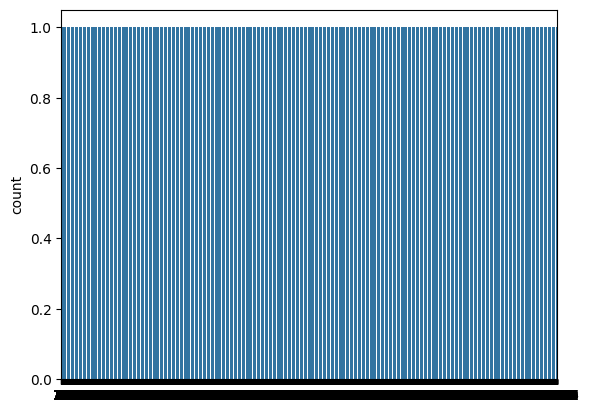

In [25]:
sns.countplot(ps_train.target_class)

Dataset is **highly imbalanced**. There are 11375 non pulsars and 1153 pulsars with us. Dataset Might need sampling before model building process. 

The most important metrics to be considered to evaluate the classification models should be F1-score and Recall since the target class is extremely less.

# **EDA on Training data**
Training sets are used for model development. Goal is to explore this data to get ideas for feature engineering and the general structure of the machine learning model as this would be used to train the model.

## Detection of Outliers

<Axes: title={'center': 'With Outliers'}>

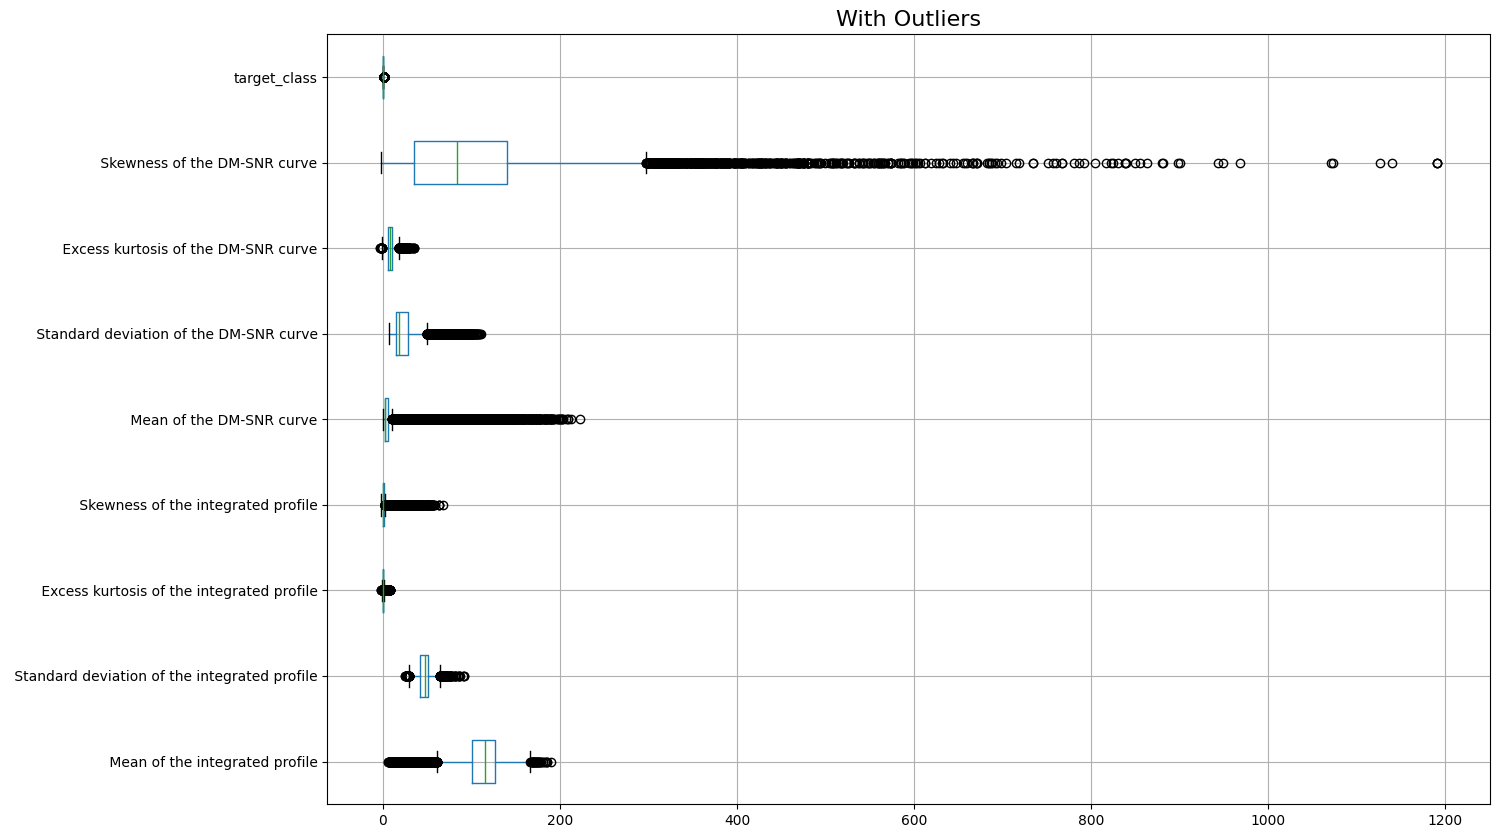

In [26]:
plt.figure(figsize=(15,10))
plt.title('With Outliers',fontsize=16)
ps_train.boxplot(vert=0)

In [27]:
# Number of outliers
Q1 = ps_train.quantile(0.25)
Q3 = ps_train.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Number of Outliers:')
((ps_train < (lower_range)) | (ps_train > (upper_range))).sum()

Number of Outliers:


 Mean of the integrated profile                   717
 Standard deviation of the integrated profile     178
 Excess kurtosis of the integrated profile        973
 Skewness of the integrated profile              1340
 Mean of the DM-SNR curve                        2047
 Standard deviation of the DM-SNR curve          1506
 Excess kurtosis of the DM-SNR curve              349
 Skewness of the DM-SNR curve                     611
target_class                                     1153
dtype: int64

In [28]:
print('Percentage of Outliers:')
((((ps_train < (lower_range)) | (ps_train > (upper_range))).sum())/17898)*100

Percentage of Outliers:


 Mean of the integrated profile                   4.006034
 Standard deviation of the integrated profile     0.994525
 Excess kurtosis of the integrated profile        5.436362
 Skewness of the integrated profile               7.486870
 Mean of the DM-SNR curve                        11.437032
 Standard deviation of the DM-SNR curve           8.414348
 Excess kurtosis of the DM-SNR curve              1.949939
 Skewness of the DM-SNR curve                     3.413789
target_class                                      6.442061
dtype: float64

Mean of the integrated profile, Standard deviation of the integrated profile, Excess kurtosis of the DM-SNR curve and Skewness of the DM-SNR curve have outliers below **5%**

Excess kurtosis of the integrated profile, Skewness of the integrated profile and Standard deviation of the DM-SNR curve  have outliers between **5%** and **10%**

Mean of the DM-SNR curve has **11.43%** of outliers

Although numerical, data appears to be on different scales. Requires scaling before building model.

## Distribution of Data

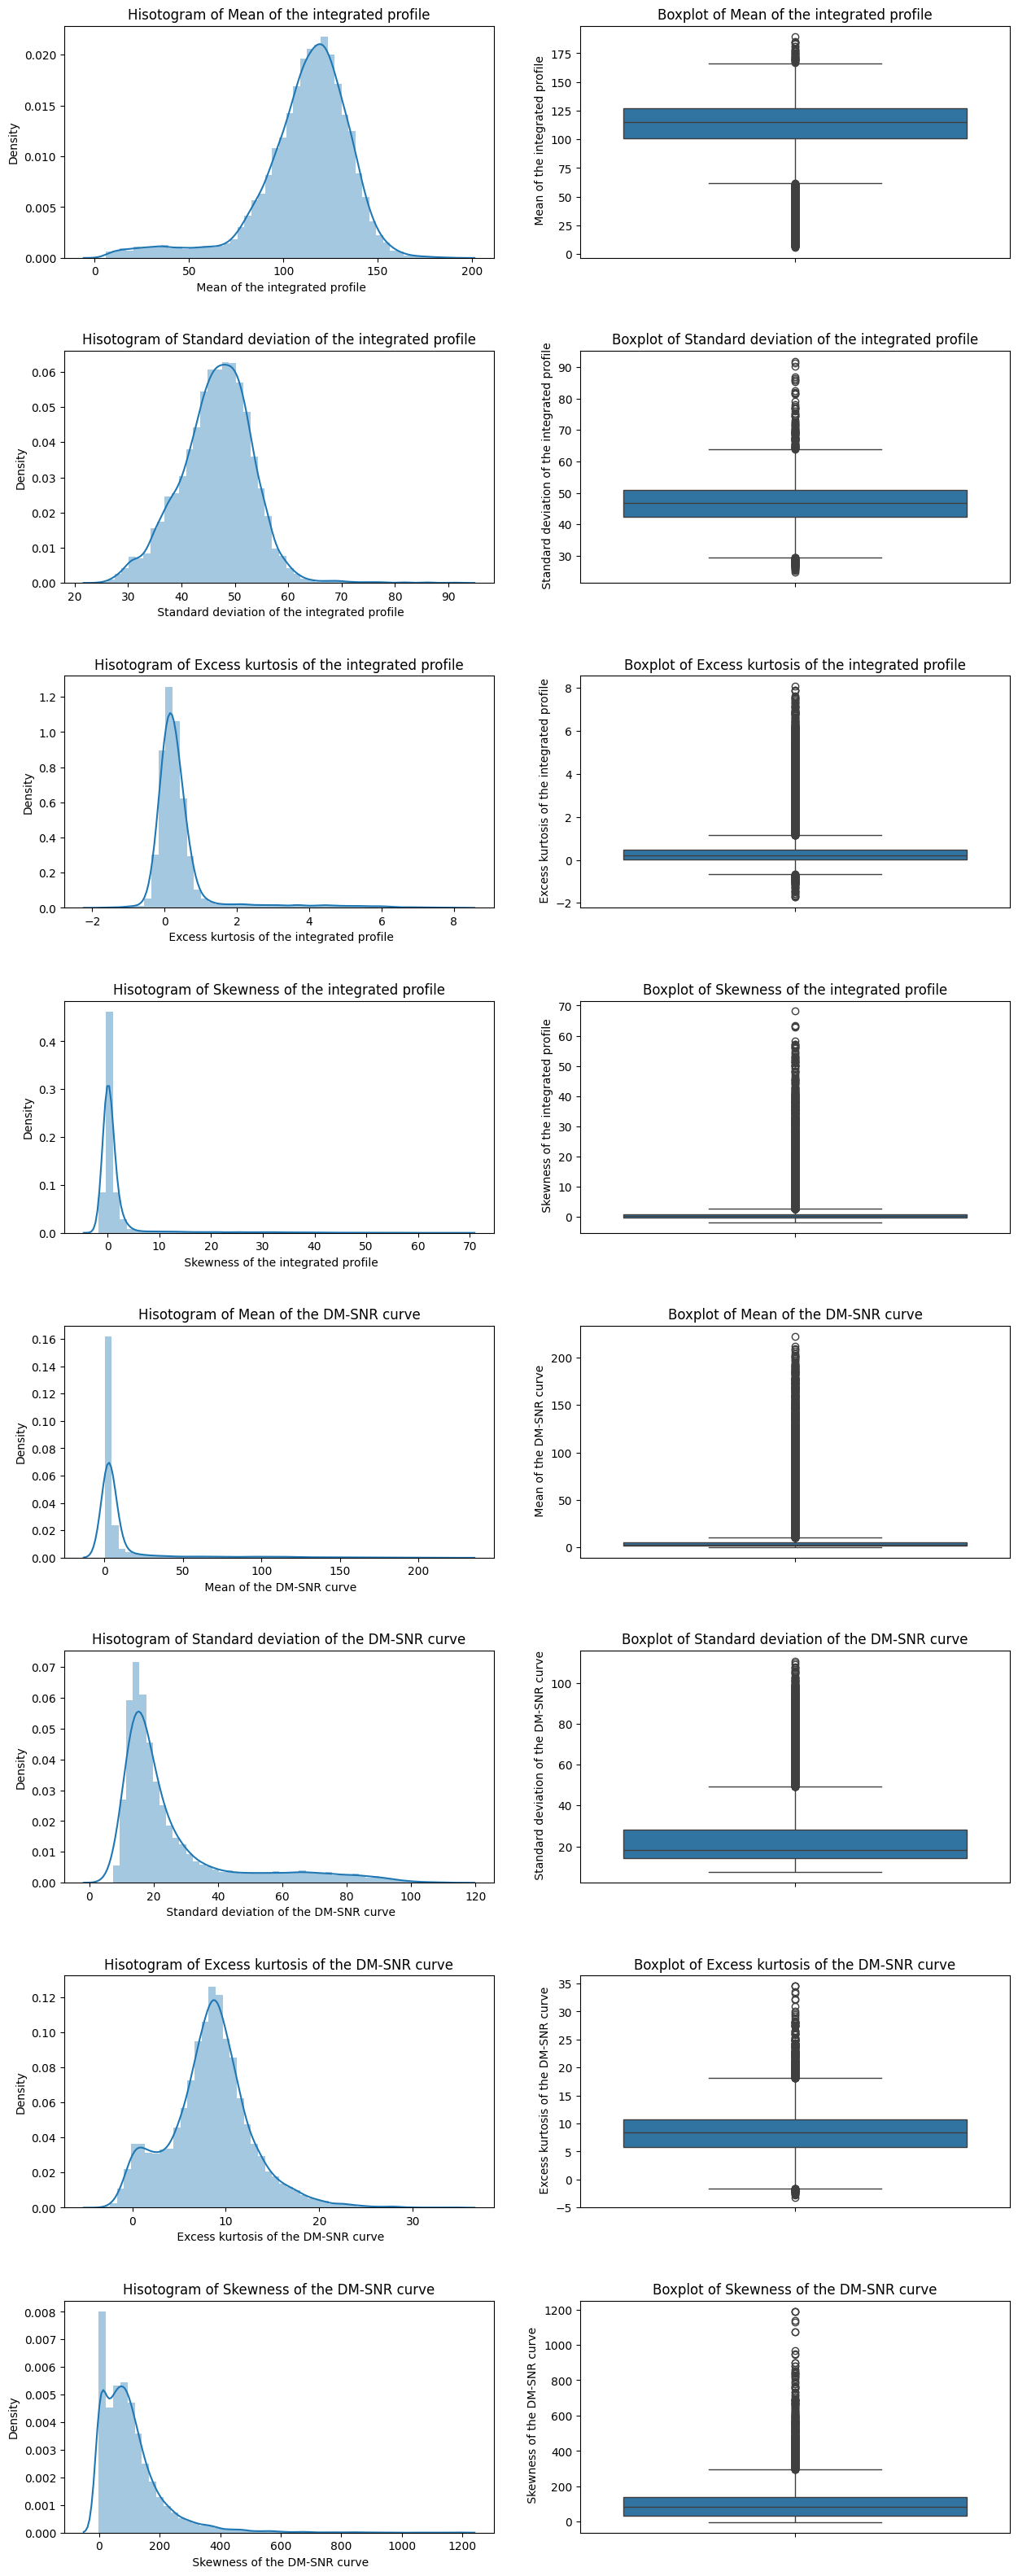

In [29]:
fig, axes = plt.subplots(nrows=8,ncols=2,  figsize=(15, 40))
fig.subplots_adjust(hspace = .4, wspace=.2)
for i in range(0,len(ps_train.columns)-1):
  sns.distplot(ps_train[ps_train.columns[i]], ax=axes[i][0]).set_title("Hisotogram of" + ps_train.columns[i])
  sns.boxplot(ps_train[ps_train.columns[i]], ax=axes[i][1]).set_title("Boxplot of" + ps_train.columns[i])

The dataset is not normally distributed. Apart from Mean and SD of integrated profile, all other variables are highly right skewed

The SD of integrated profile appears normal but has a tail in right side and only the mean of IP has heavy tail on left side and is thus left skewed

## Pairplot

In [30]:
ps_train_pairplot = ps_train.copy() #creating deep copy
ps_train_pairplot = ps_train_pairplot.rename(columns={' Mean of the integrated profile': 'Mean IP', ' Standard deviation of the integrated profile': 'SD IP',
                                  ' Excess kurtosis of the integrated profile': 'EK IP',' Skewness of the integrated profile': 'Skewness IP',
                                  ' Mean of the DM-SNR curve':'Mean DM-SNR',' Standard deviation of the DM-SNR curve': 'SD DM-SNR',
                                  ' Excess kurtosis of the DM-SNR curve': 'EK DM-SNR', ' Skewness of the DM-SNR curve': 'Skewness DM-SNR'})
# Changing column names for better pairplot visualization

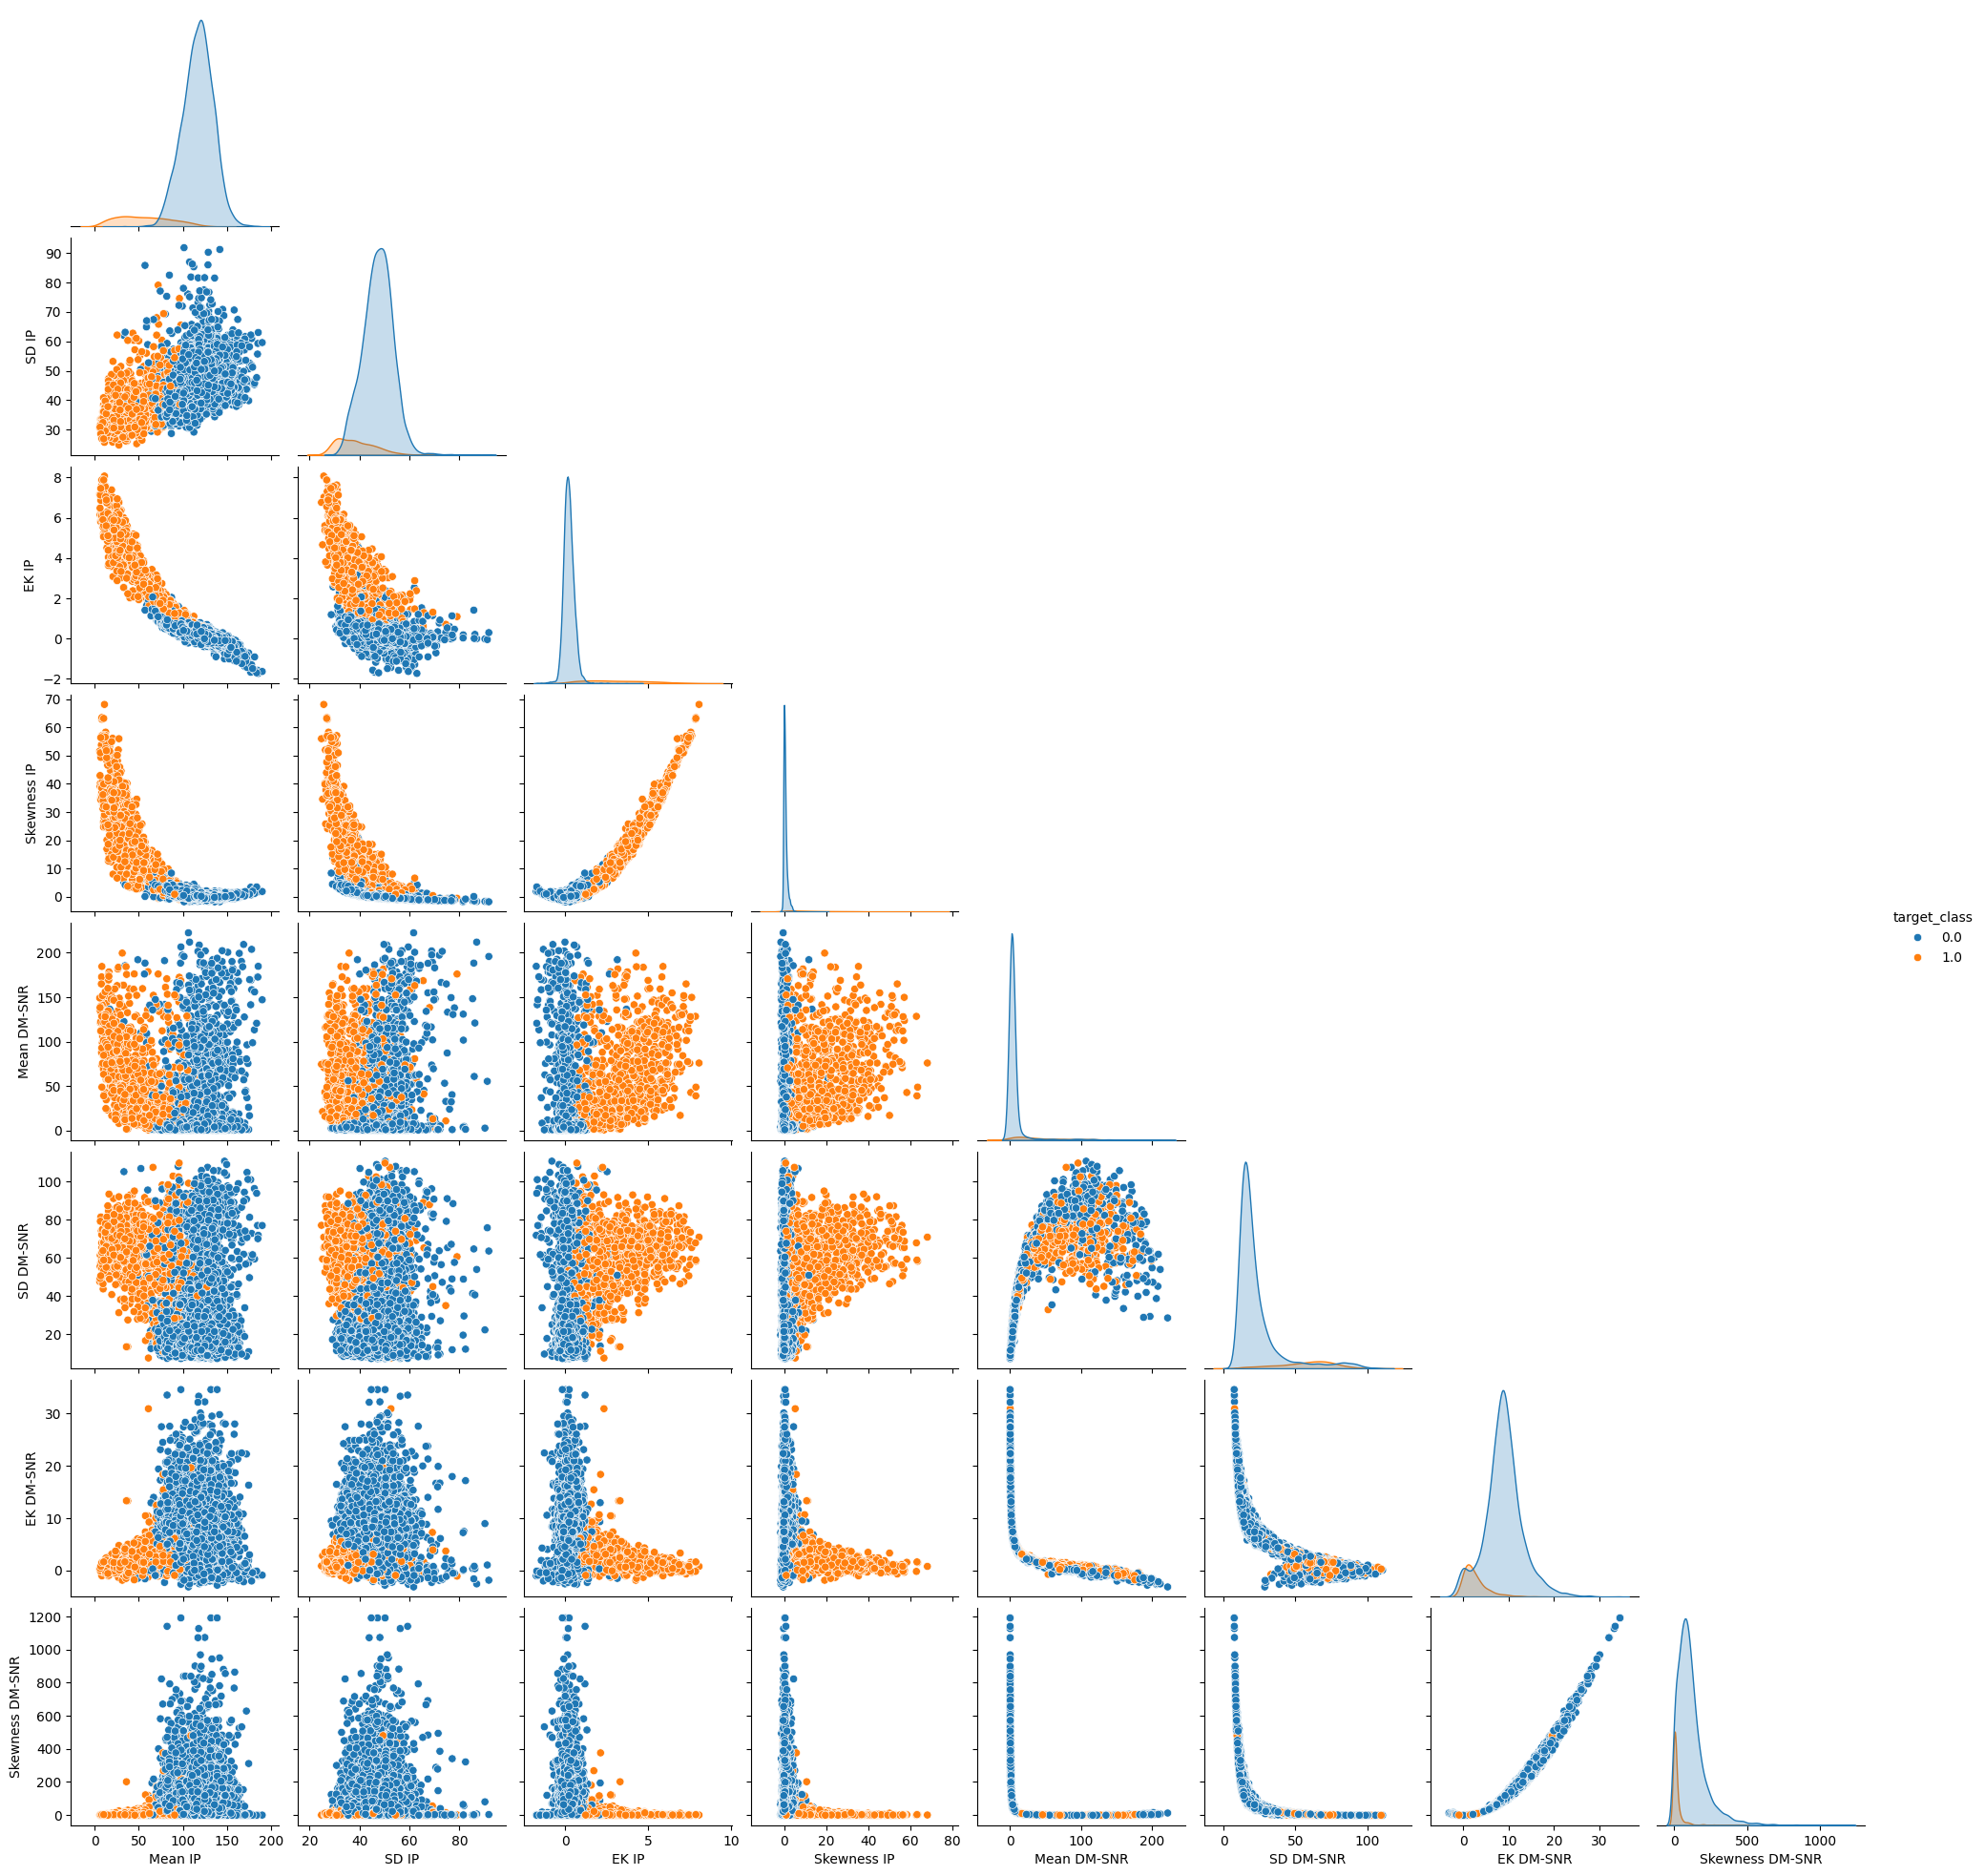

In [31]:
sns.pairplot(data = ps_train_pairplot,hue = 'target_class',corner = True) #,height = 3,aspect = 1.2

KDE plot shows different densities for both target classes, could be useful for classifying the pulsars from non pulsars

**Positive Correlation:**

* Skewness and excess Kurtosis of IP
* Skewness and excess Kurtosis of DM-SNR curve

**Negative Correlation:**

* Mean and SD of IP with excess Kurtosis and skewness of IP 
* Mean and SD of DM-SNR curve with excess Kurtosis and skewness of DM-SNR curve
* Excess Kurtosis and skewness of IP with excess Kurtosis and skewness of DM-SNR curve

## Correlation among variables

<Axes: >

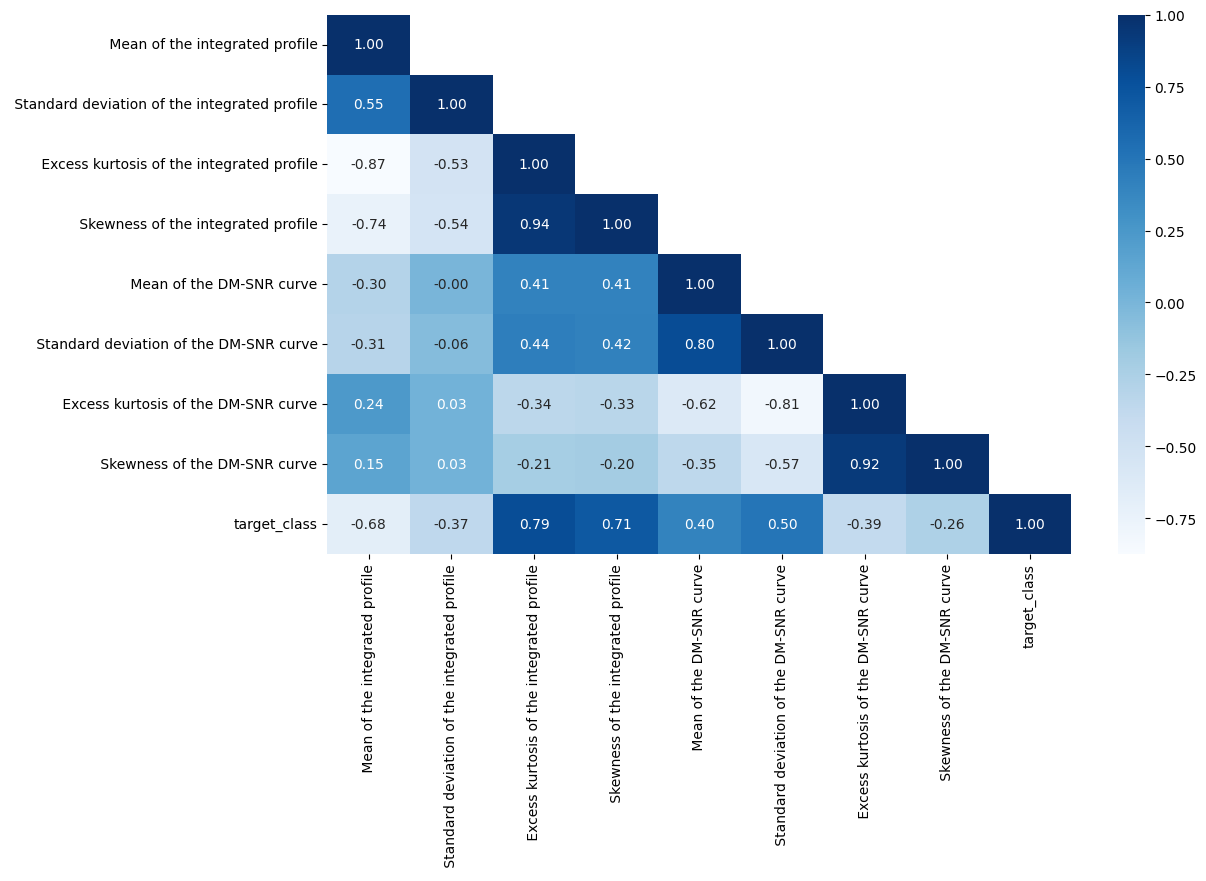

In [32]:
plt.figure(figsize=(12,7))
sns.heatmap(ps_train.corr(), annot=True, fmt='.2f', cmap='Blues',mask=np.triu(ps_train.corr(),+1))

**Correlations between 2 dependent variables**

Highly positively correlated:

*   **Skewness of the integrated profile** and **Excess kurtosis of the DM-SNR curve** 
*   **Skewness of the DM-SNR curve** and **Excess kurtosis of the DM-SNR curve**
* **Mean the DM-SNR curve** and **Standard Deviation of the DM-SNR curve**

Highly negatively correlated:

*   **Mean of the integrated profile** and **Excess kurtosis of the integrated profile**
*   **Mean of the integrated profile** and **Skewness of the integrated profile**
* **Excess kurtosis the DM-SNR curve** and **Standard Deviation of the DM-SNR curve**

**Correlations between independent and dependent variable**
 
**Excess kurtosis of the integrated profile** and **Skewness of the integrated profile** have a high positive correlation with **Target_class**. ,**Mean of the integrated profile** has high negative correlation with **Target_class**.

Correlation indicates multicollinearity in data, which is undesirable during model building, needs to be treated during data preprocessing process.

# **EDA of True Pulsar stars**
An attempt to study the attribute values of real pulsars and see if there is a trend in them

In [33]:
ps_train_1 = ps_train[ps_train.target_class == 1] #creating a dataset for only true pulsars for EDA
ps_train_0 = ps_train[ps_train.target_class == 0] #creating a dataset for only non pulsars for EDA
ps_train_1.shape

(1153, 9)

In [34]:
ps_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1153 entries, 31 to 12521
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                1153 non-null   float64
 1    Standard deviation of the integrated profile  1153 non-null   float64
 2    Excess kurtosis of the integrated profile     995 non-null    float64
 3    Skewness of the integrated profile            1153 non-null   float64
 4    Mean of the DM-SNR curve                      1153 non-null   float64
 5    Standard deviation of the DM-SNR curve        1048 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           1153 non-null   float64
 7    Skewness of the DM-SNR curve                  1091 non-null   float64
 8   target_class                                   1153 non-null   float64
dtypes: float64(9)
memory usage: 90.1 KB


## Missing Values of Pulsars

In [35]:
ps_train_1.isnull().sum()

 Mean of the integrated profile                    0
 Standard deviation of the integrated profile      0
 Excess kurtosis of the integrated profile       158
 Skewness of the integrated profile                0
 Mean of the DM-SNR curve                          0
 Standard deviation of the DM-SNR curve          105
 Excess kurtosis of the DM-SNR curve               0
 Skewness of the DM-SNR curve                     62
target_class                                       0
dtype: int64

In [36]:
print("Total % of missing values:")
print('Excess kurtosis of the integrated profile: ', round(((158/1153)*100),2),'%')
print('Standard deviation of the DM-SNR curve: ', round(((105/1153)*100),2),'%')
print('Skewness of the DM-SNR curve:: ', round(((62/1153)*100),2),'%')

Total % of missing values:
Excess kurtosis of the integrated profile:  13.7 %
Standard deviation of the DM-SNR curve:  9.11 %
Skewness of the DM-SNR curve::  5.38 %


## Description of Pulsars



Even for true pulsar readings some missing values are present

In [37]:
ps_train_1.describe()

Mean of the integrated profile  \
count                      1153.000000   
mean                         56.522990   
std                          29.816937   
min                           5.812500   
25%                          31.937500   
50%                          54.296875   
75%                          79.148438   
max                         137.929688   

        Standard deviation of the integrated profile  \
count                                    1153.000000   
mean                                       38.708515   
std                                         7.873757   
min                                        24.772042   
25%                                        32.278027   
50%                                        37.534642   
75%                                        43.768735   
max                                        79.084407   

        Excess kurtosis of the integrated profile  \
count                                  995.000000   
mean                                     3.123432   
std                                      1.875355   
min                                     -0.094888   
25%                                      1.578871   
50%                                      2.965753   
75%                                      4.526565   
max                                      8.069522   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                          1153.000000                1153.000000   
mean                             15.566358                  49.913590   
std                              14.140326                  45.134002   
min                              -1.139069                   0.486622   
25%                               3.813617                  12.728261   
50%                              11.238433                  33.880435   
75%                              24.713179                  78.484114   
max                              68.101622                 199.577759   

        Standard deviation of the DM-SNR curve  \
count                              1048.000000   
mean                                 56.921437   
std                                  19.733430   
min                                   7.658623   
25%                                  44.385239   
50%                                  59.795023   
75%                                  71.377011   
max                                 109.655345   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                           1153.000000                    1091.000000   
mean                               2.780529                      17.939904   
std                                3.208045                      46.928676   
min                               -1.862320                      -1.874683   
25%                                0.742935                      -0.246479   
50%                                1.890020                       2.482176   
75%                                3.709284                      13.833544   
max                               30.883882                     479.670964   

       target_class  
count        1153.0  
mean            1.0  
std             0.0  
min             1.0  
25%             1.0  
50%             1.0  
75%             1.0  
max             1.0


## Distribution of Pulsars

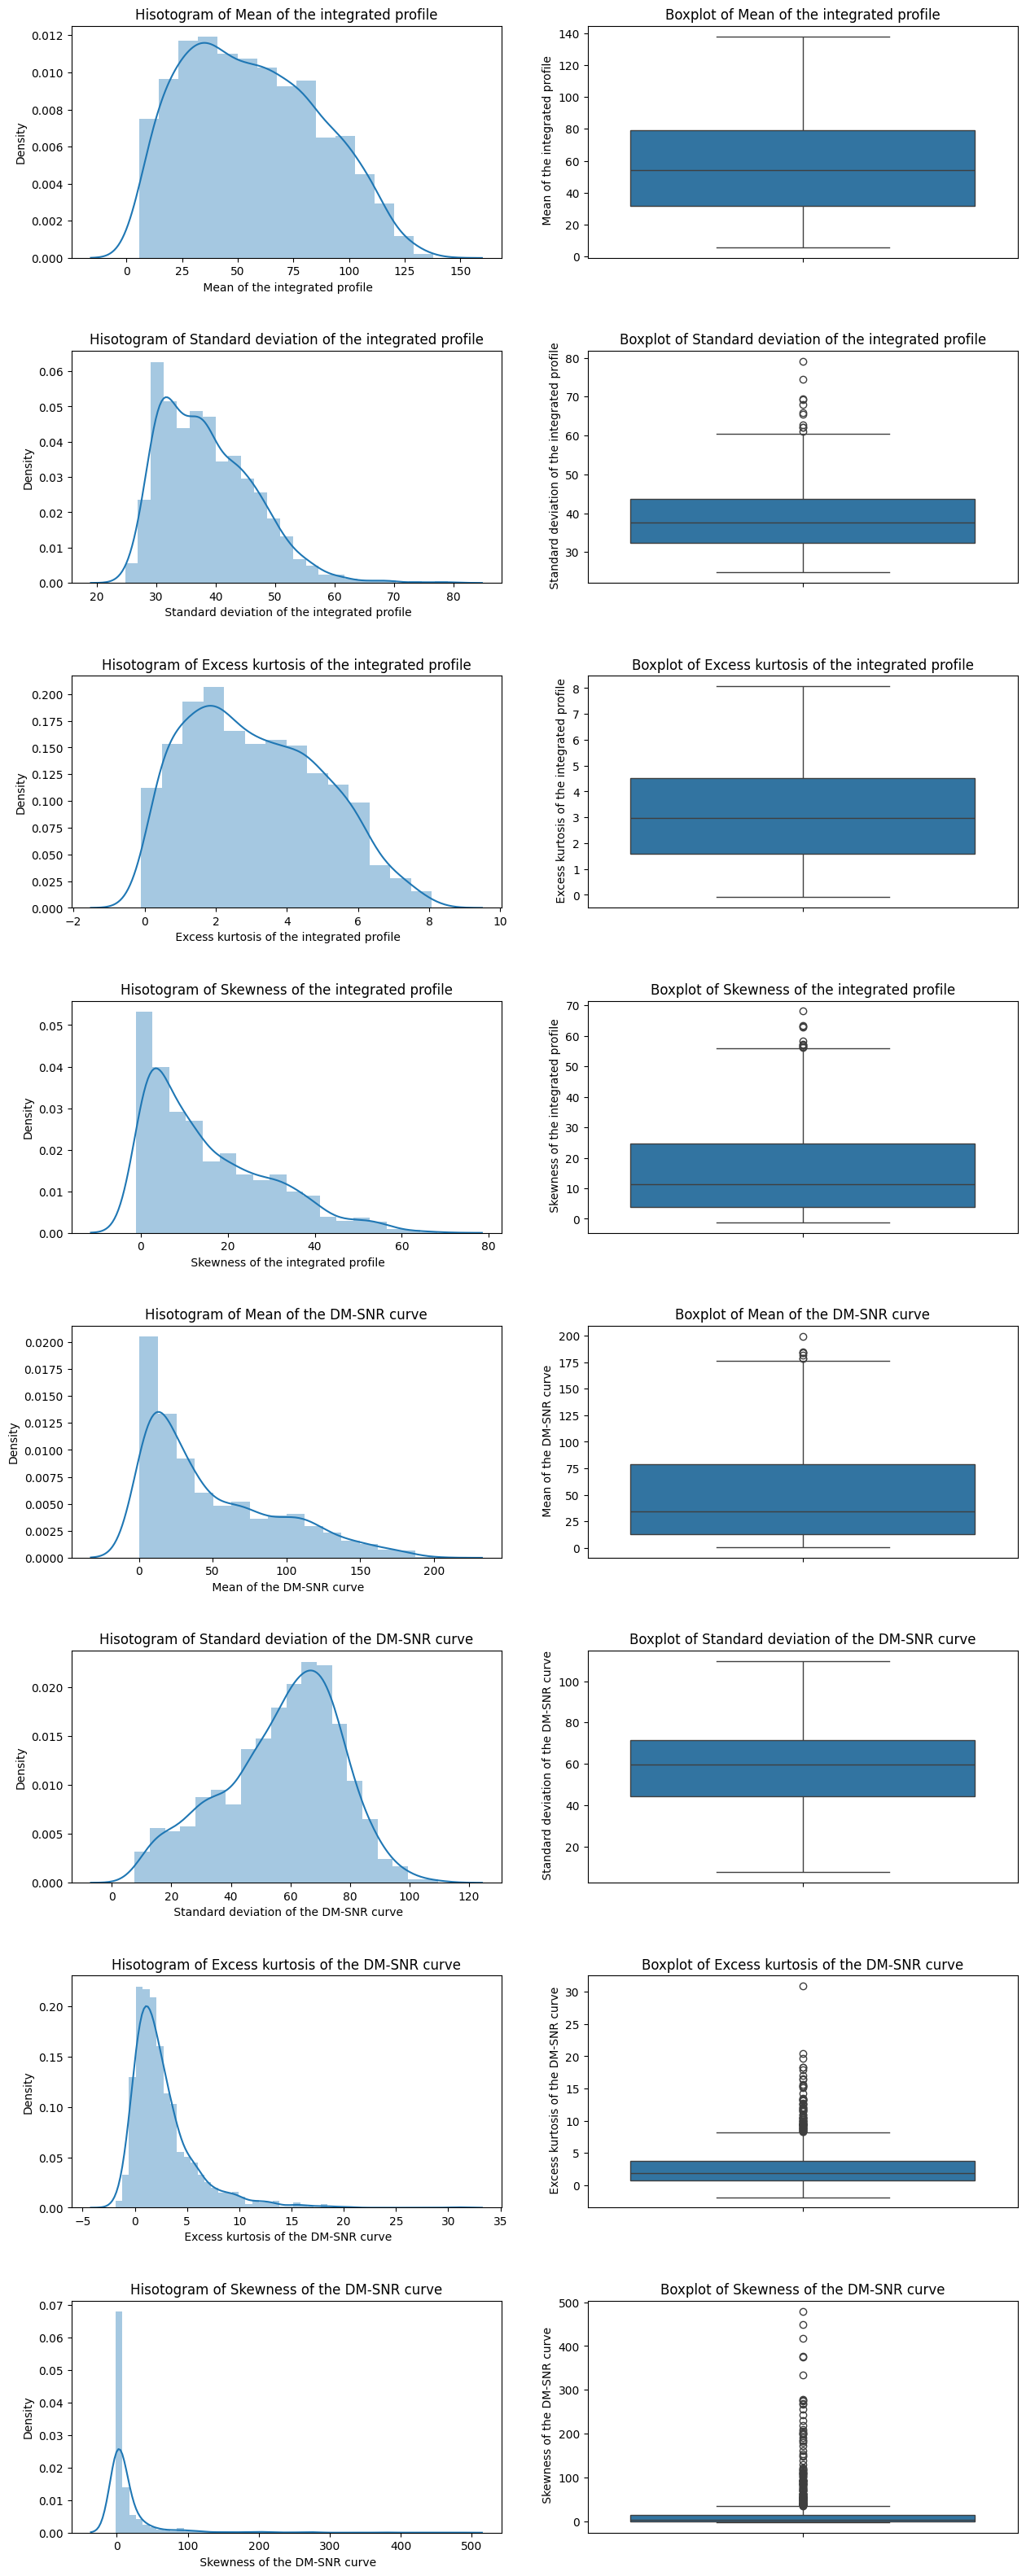

In [38]:
fig, axes = plt.subplots(nrows=8,ncols=2,  figsize=(15, 40))
fig.subplots_adjust(hspace = .4, wspace=.2)
for i in range(0,len(ps_train_1.columns)-1):
  sns.distplot(ps_train_1[ps_train_1.columns[i]], ax=axes[i][0]).set_title("Hisotogram of" + ps_train_1.columns[i])
  sns.boxplot(ps_train_1[ps_train_1.columns[i]], ax=axes[i][1]).set_title("Boxplot of" + ps_train_1.columns[i])

**Integrated Profile**
* **Mean:** It has *no outliers*, *slightly right skewed* with mean = **56.52** and SD = **29.81**.
* **SD:** It has *some outliers*, *right skewed* with mean = **38.7** and SD = **7.87**.
* **Excess Kurtosis:** It has *no outliers*, *slighly right skewed* with mean = **3.12** and SD = **1.87**.
* **Skewness:** It has *some outliers*, *right skewed* with mean = **15.56** and SD = **14.14**.
---

> Considering the population to be *normally distributed*, we can expect an intergrated profile of a pulsar star to have a mean around 56; Have high SD of around 38; be highly skewed towards right as mean skewness is expected to be around 15; and have highly pointed curve and heavy tails as mean excess Kurtosis is 3.12

---

**DM-SNR Curve**
* **Mean:** It has *very few outliers*, *right skewed* with mean = **44.91** and SD = **45.13**.
* **SD:** It has *no outliers*, *slightly right skewed* with mean = **56.92** and SD = **19.73**.
* **Excess Kurtosis:** It has *some outliers*, *extreme right skewed* with mean = **2.78** and SD = **3.20**.
* **Skewness:** It has *some outliers*, *extreme right skewed* with mean = **17.93** and SD = **46.92**.
---

> Considering the population to be *normally distributed*, we can expect an DM-SNR curve of a pulsar star to have a mean around 45; Have high SD of around 57; be highly skewed towards right as mean skewness is expected to be around 18; and have highly pointed curve and heavy tails as mean excess Kurtosis is 2.78

---


# **EDA of Non Pulsars**
An attempt to study the attribute values of non pulsars

In [39]:
ps_train_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11375 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                11375 non-null  float64
 1    Standard deviation of the integrated profile  11375 non-null  float64
 2    Excess kurtosis of the integrated profile     9798 non-null   float64
 3    Skewness of the integrated profile            11375 non-null  float64
 4    Mean of the DM-SNR curve                      11375 non-null  float64
 5    Standard deviation of the DM-SNR curve        10302 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           11375 non-null  float64
 7    Skewness of the DM-SNR curve                  10812 non-null  float64
 8   target_class                                   11375 non-null  float64
dtypes: float64(9)
memory usage: 888.7 KB


## Missing Values of Non Pulsars

In [40]:
ps_train_0.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1577
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1073
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     563
target_class                                        0
dtype: int64

In [41]:
print("Total % of missing values:")
print('Excess kurtosis of the integrated profile: ', round(((1577/11375)*100),2),'%')
print('Standard deviation of the DM-SNR curve: ', round(((1073/11375)*100),2),'%')
print('Skewness of the DM-SNR curve:: ', round(((563/11375)*100),2),'%')

Total % of missing values:
Excess kurtosis of the integrated profile:  13.86 %
Standard deviation of the DM-SNR curve:  9.43 %
Skewness of the DM-SNR curve::  4.95 %


## Description of Non Pulsars

In [42]:
ps_train_0.describe()

Mean of the integrated profile  \
count                     11375.000000   
mean                        116.568016   
std                          17.435963   
min                          17.210938   
25%                         105.261719   
50%                         117.343750   
75%                         128.417969   
max                         189.734375   

        Standard deviation of the integrated profile  \
count                                   11375.000000   
mean                                       47.313376   
std                                         6.152175   
min                                        28.698714   
25%                                        43.368767   
50%                                        47.460343   
75%                                        51.276459   
max                                        91.808628   

        Excess kurtosis of the integrated profile  \
count                                 9798.000000   
mean                                     0.209956   
std                                      0.330590   
min                                     -1.738021   
25%                                      0.007184   
50%                                      0.185609   
75%                                      0.392066   
max                                      4.529319   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         11375.000000               11375.000000   
mean                              0.380851                   8.900132   
std                               0.987840                  24.590521   
min                              -1.791886                   0.213211   
25%                              -0.221756                   1.843645   
50%                               0.130436                   2.626254   
75%                               0.665416                   4.202341   
max                              20.695445                 222.421405   

        Standard deviation of the DM-SNR curve  \
count                             10302.000000   
mean                                 23.241487   
std                                  16.714756   
min                                   7.370432   
25%                                  14.110644   
50%                                  17.570435   
75%                                  24.441031   
max                                 110.642211   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          11375.000000                   10812.000000   
mean                               8.896352                     114.363754   
std                                4.263079                     107.816451   
min                               -3.139270                      -1.976976   
25%                                6.638538                      47.774303   
50%                                8.778976                      90.672292   
75%                               10.973332                     146.369163   
max                               34.539844                    1191.000837   

       target_class  
count       11375.0  
mean            0.0  
std             0.0  
min             0.0  
25%             0.0  
50%             0.0  
75%             0.0  
max             0.0

## Distribution of Non Pulsars

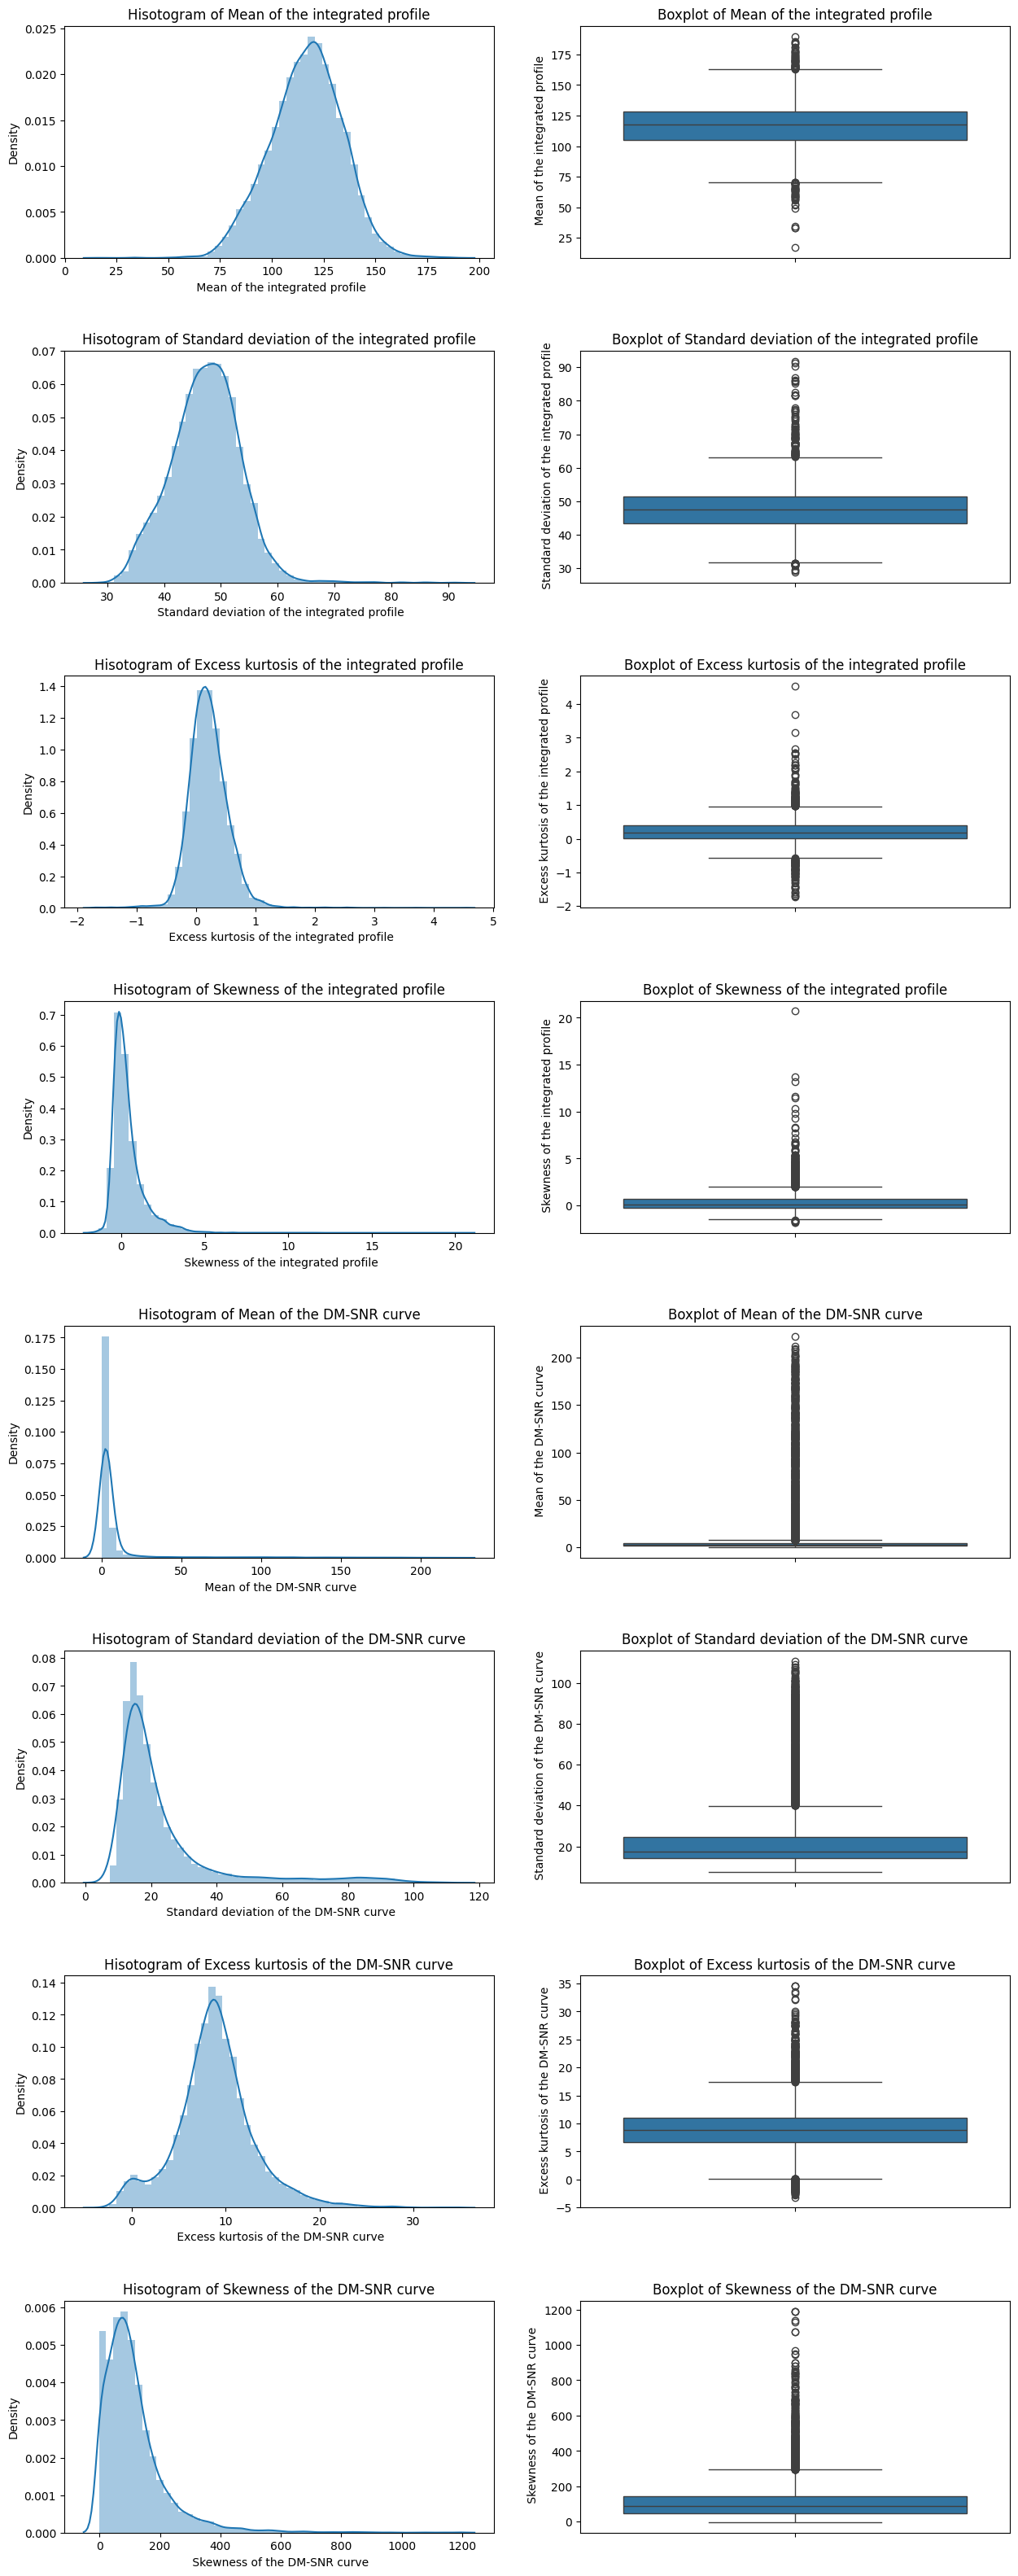

In [43]:
fig, axes = plt.subplots(nrows=8,ncols=2,  figsize=(15, 40))
fig.subplots_adjust(hspace = .4, wspace=.2)
for i in range(0,len(ps_train_0.columns)-1):
  sns.distplot(ps_train_0[ps_train_0.columns[i]], ax=axes[i][0]).set_title("Hisotogram of" + ps_train_0.columns[i])
  sns.boxplot(ps_train_0[ps_train_0.columns[i]], ax=axes[i][1]).set_title("Boxplot of" + ps_train_0.columns[i])

**Integrated Profile**
* **Mean:** It has *some outliers*, *normally distributed* with mean = **116.56** and SD = **17.43**.
* **SD:** It has *some outliers*, *almost normally distributed,having right tail* with mean = **47.31** and SD = **6.15**.
* **Excess Kurtosis:** It has *some outliers*, *almost normally distributed, having tail on both sides* with mean = **0.20** and SD = **0.33**.
* **Skewness:** It has *some outliers*, *right skewed* with mean = **0.38** and SD = **0.98**.
---

> Considering the population to be *normally distributed*, we can expect an intergrated profile of a non pulsar star to have a mean around 117; Have high SD of around 47; not skewed as mean skewness is expected to be around 0.38; and have slightly pointed curve as mean excess Kurtosis is 0.38

---

**DM-SNR Curve**
* **Mean:** It has *few outliers*, *extreme right skewed* with mean = **8.90** and SD = **24.59**.
* **SD:** It has *few outliers*, *right skewed* with mean = **23.24** and SD = **16.71**.
* **Excess Kurtosis:** It has *some outliers*, *slightly right skewed* with mean = **8.89** and SD = **4.26**.
* **Skewness:** It has *some outliers*, *right skewed* with mean = **114.36** and SD = **107.81**.
---

> Considering the population to be *normally distributed*, we can expect an DM-SNR curve of a non pulsar star to have a mean around 9; Have high SD of around 23; be highly skewed towards right as mean skewness is expected to be around 114; and have highly pointed curve and heavy tails as mean excess Kurtosis is 8.89

---


# **Comparison of Pulsars and Non Pulsars**

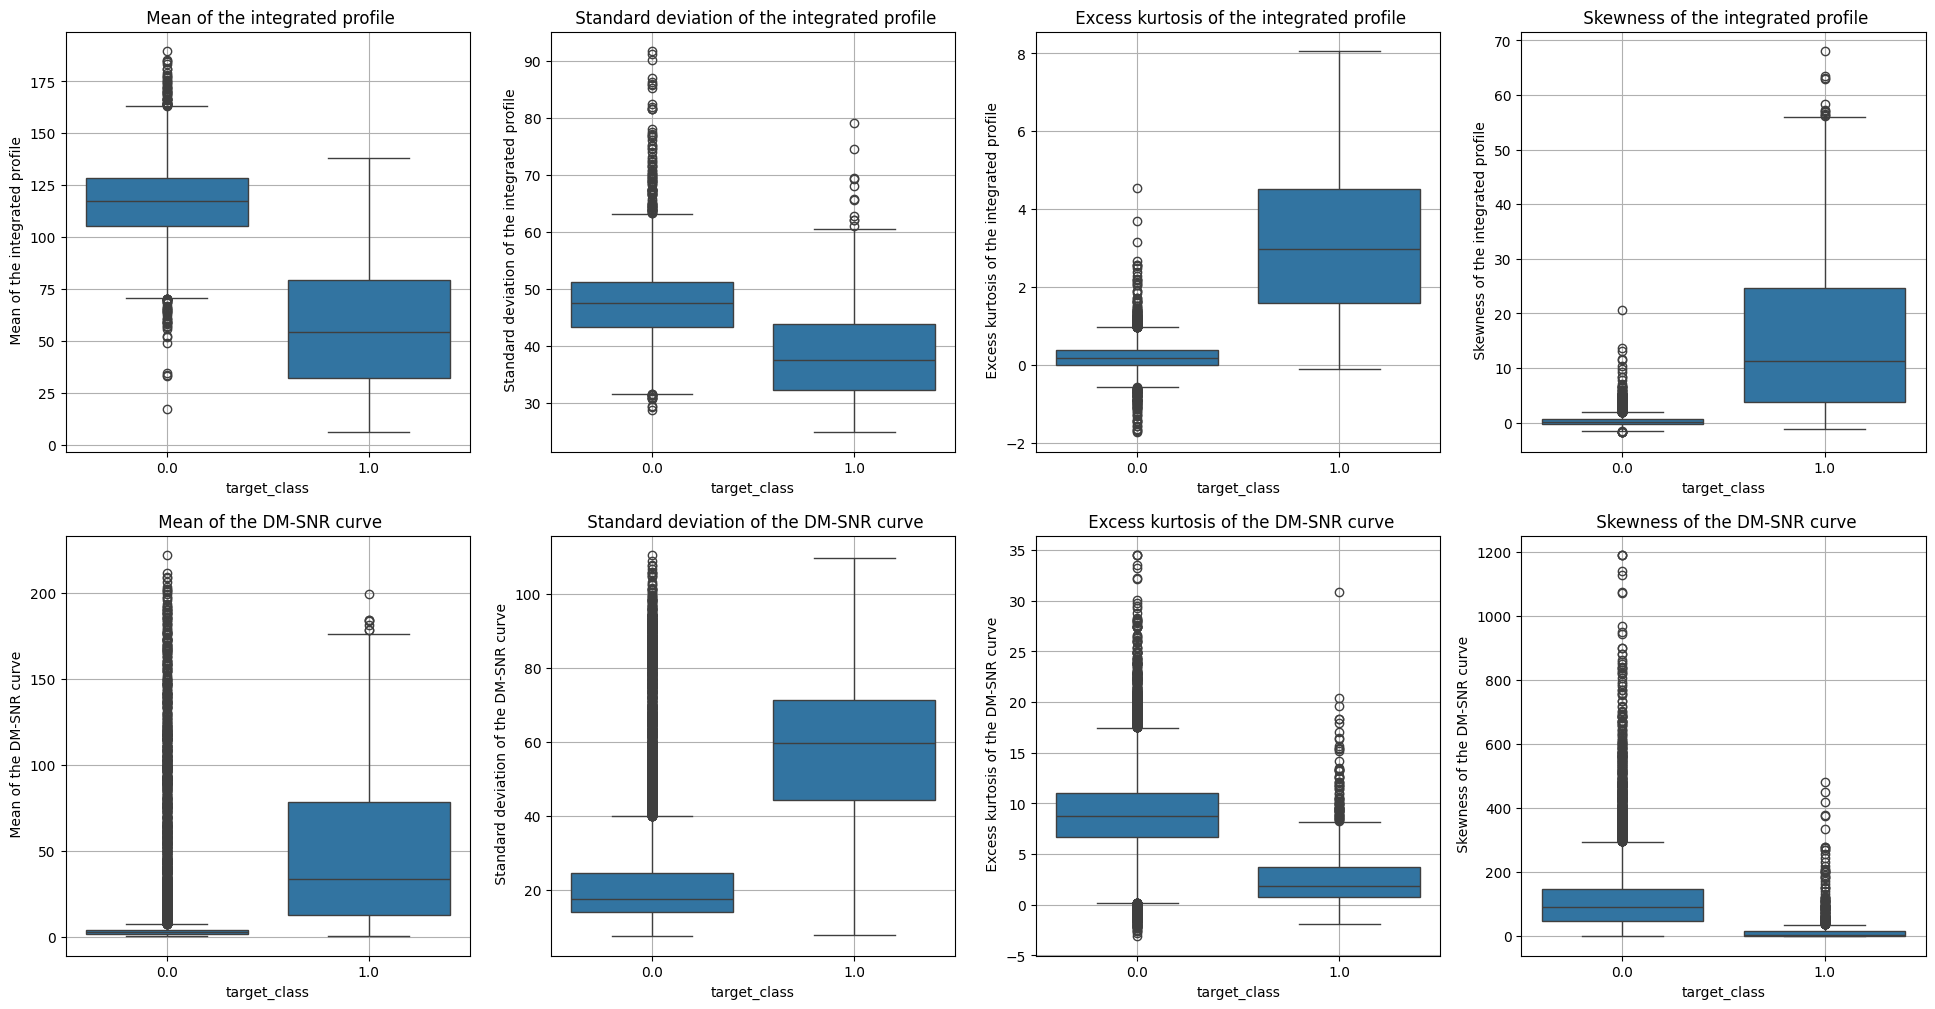

In [44]:
fig=plt.figure(figsize=(24,12))
for i in range(0,len(ps_train.columns)-1):
    ax=fig.add_subplot(2,4,i+1).set_title(ps_train.columns[i])
    sns.boxplot(x = 'target_class', y = ps_train.columns[i], data = ps_train)
    plt.grid()

**Table of Values**

|        | Pulsar     | Non Pulsar  |   Pulsar     | Non Pulsar     |
| :------------- | :----------: | -----------: |:----------: | -----------: |
|        | **Integrated Profile**    |     | **DM SNR Curve**     |      |
|  Mean | 56.52   |  116.56   |44.91   | 8.90  |  
| Standard Deviation   |38.7 |  56.92 |  116.56   |23.24   |
| Excess Kurtosis   |3.12 |  0.2 |  2.78   |8.89  |
| Skewness   |15.56 |  0.38 |  17.93   |114.36   |



The magnitude of pulsars and non pulsars are at different scales as evident from above boxplots, indepth distribution of pulsars was covered above, the differences observed from non pulsars are as follows:

**Integrated Profile**
* **Mean:** The overall distribution of **non pulsars has** **higher magnitude around 117** as compared with **pulsars having mean around 56**
* **SD:** The magnitude of SD is **higher for non pulsars with mean around 47** as compared with **pulsars having mean around 38**
* **Excess Kurtosis:** It is **pretty low for non-pulsars with mean around 0.2** as compared with **pulsars having high mean kurtosis of 3.12**. It means pulsars have way pointier IP than non pulsars
* **Skewness:** It is pretty low for **non pulsars mean around 0.38 (like normal distribution)** as compared with **pulsars having high skewness of 15**.

**DM-SNR Curve**
* **Mean:** The overall distribution of non pulsars has **very low magnitude around 8** as compared with **pulsars having mean around 56** and also has lot of outliers
* **SD:** The magnitude of SD is also **lower for non pulsars with mean around 23** as compared with **pulsars having mean around 38**
* **Excess Kurtosis:** It is **higher for non-pulsars with mean around 9** as compared with **pulsars having mean kurtosis of 3.12.** It means non pulsars have way pointier DM-SNR curve than pulsars
* **Skewness:** It is also **pretty high mean around 114 for non pulsars** as compared with **pulsars having skewness of 15**. The DM-SNR curve seems to be extremely highly right skewed for non pulsars

# **Data Preprocessing**


## Missing Value Treatment

### **1. Using Statistical methods**

In [45]:
print('There are total 12528 observations\n')
print("Total missing values for train set:")
print('Excess kurtosis of the integrated profile: ', 1735)
print('Standard deviation of the DM-SNR curve: ', 1178)
print('Skewness of the DM-SNR curve: ', 625 ,"\n")

print("Total % of missing values for train set:")
print('Excess kurtosis of the integrated profile: ', round(((1735/12528)*100),2),'%')
print('Standard deviation of the DM-SNR curve: ', round(((1178/12528)*100),2),'%')
print('Skewness of the DM-SNR curve:: ', round(((625/12528)*100),2),'%')

There are total 12528 observations

Total missing values for train set:
Excess kurtosis of the integrated profile:  1735
Standard deviation of the DM-SNR curve:  1178
Skewness of the DM-SNR curve:  625 

Total % of missing values for train set:
Excess kurtosis of the integrated profile:  13.85 %
Standard deviation of the DM-SNR curve:  9.4 %
Skewness of the DM-SNR curve::  4.99 %


Out of all columns, only 3 columns had missing values and in given percentages. As confirmed from the distribution of these columns at **line 22**, they are **highly skewed and contain outliers**. So, if we are replacing missing values using statistical methods, it will be best to impute missing values using **median**.

We create a new dataframe below in which this method is implemented

In [46]:
ps_train_median = ps_train.fillna(value=ps_train[[' Excess kurtosis of the integrated profile',' Standard deviation of the DM-SNR curve',' Skewness of the DM-SNR curve']].median())

In [47]:
ps_train_median.isnull().sum() #null values successfully imputed

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [48]:
ps_train_median.describe()

Mean of the integrated profile  \
count                     12528.000000   
mean                        111.041841   
std                          25.672828   
min                           5.812500   
25%                         100.871094   
50%                         115.183594   
75%                         127.109375   
max                         189.734375   

        Standard deviation of the integrated profile  \
count                                   12528.000000   
mean                                       46.521437   
std                                         6.801077   
min                                        24.772042   
25%                                        42.362222   
50%                                        46.931022   
75%                                        50.979103   
max                                        91.808628   

        Excess kurtosis of the integrated profile  \
count                                12528.000000   
mean                                     0.443251   
std                                      0.992144   
min                                     -1.738021   
25%                                      0.057820   
50%                                      0.223678   
75%                                      0.421239   
max                                      8.069522   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         12528.000000               12528.000000   
mean                              1.778431                  12.674758   
std                               6.208450                  29.613230   
min                              -1.791886                   0.213211   
25%                              -0.188142                   1.910535   
50%                               0.203317                   2.792642   
75%                               0.932374                   5.413253   
max                              68.101622                 222.421405   

        Standard deviation of the DM-SNR curve  \
count                             12528.000000   
mean                                 25.604827   
std                                  18.809291   
min                                   7.370432   
25%                                  14.761144   
50%                                  18.412402   
75%                                  26.473142   
max                                 110.642211   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          12528.000000                   12528.000000   
mean                               8.333489                     104.408308   
std                                4.535783                     104.799639   
min                               -3.139270                      -1.976976   
25%                                5.803063                      38.128424   
50%                                8.451097                      83.126301   
75%                               10.727927                     135.774973   
max                               34.539844                    1191.000837   

       target_class  
count  12528.000000  
mean       0.092034  
std        0.289085  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [49]:
ps_train.describe() #of original train set

Mean of the integrated profile  \
count                     12528.000000   
mean                        111.041841   
std                          25.672828   
min                           5.812500   
25%                         100.871094   
50%                         115.183594   
75%                         127.109375   
max                         189.734375   

        Standard deviation of the integrated profile  \
count                                   12528.000000   
mean                                       46.521437   
std                                         6.801077   
min                                        24.772042   
25%                                        42.362222   
50%                                        46.931022   
75%                                        50.979103   
max                                        91.808628   

        Excess kurtosis of the integrated profile  \
count                                10793.000000   
mean                                     0.478548   
std                                      1.064708   
min                                     -1.738021   
25%                                      0.024652   
50%                                      0.223678   
75%                                      0.473125   
max                                      8.069522   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         12528.000000               12528.000000   
mean                              1.778431                  12.674758   
std                               6.208450                  29.613230   
min                              -1.791886                   0.213211   
25%                              -0.188142                   1.910535   
50%                               0.203317                   2.792642   
75%                               0.932374                   5.413253   
max                              68.101622                 222.421405   

        Standard deviation of the DM-SNR curve  \
count                             11350.000000   
mean                                 26.351318   
std                                  19.610842   
min                                   7.370432   
25%                                  14.404353   
50%                                  18.412402   
75%                                  28.337418   
max                                 110.642211   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          12528.000000                   11903.000000   
mean                               8.333489                     105.525779   
std                                4.535783                     107.399585   
min                               -3.139270                      -1.976976   
25%                                5.803063                      35.199899   
50%                                8.451097                      83.126301   
75%                               10.727927                     139.997850   
max                               34.539844                    1191.000837   

       target_class  
count  12528.000000  
mean       0.092034  
std        0.289085  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

We can see that the **mean** and **standard deviation** values in the treated dataframe is close to the values in original dataframe. So we can consider this method for missing value treatment.

### **2. Using Linear Regression**

If we check out the correlation plot in **line 25** and pairlot in **line 24**, we see that the missing valued columns are highly and linearly positively correlated with the non missing valued columns in the following combination: (in bracket coefficient values)

1.   **Excess kurtosis of the integrated profile** : Skewness of integrated profile (0.94)
2.   **Standard deviation of the DM-SNR curve** : Mean of the DM-SNR curve (0.8)
3.   **Skewness of the DM-SNR curve** : Excess kurtosis of DM-SNR curve(0.92)

If we know there is a correlation between the missing valued variables and other variables, we can often get better guesses by regressing the missing variable on other variables. So we will be using simple linear regression where 

X = column with complete data (predictor)

y = column with missing data (regressor)

In [50]:
ps_train_LR = ps_train.copy() #new dataframe for linear regression method

In [51]:
# Preparing data for modelling

#dataframe with only sets of required columns with no missing values

# For Excess kurtosis of the integrated profile
df1 = ps_train.dropna(axis = 0, subset = [' Excess kurtosis of the integrated profile',' Skewness of the integrated profile']) 
df1 = df1.loc[:,[' Excess kurtosis of the integrated profile',' Skewness of the integrated profile']] 
df1_miss = pd.DataFrame(ps_train[' Skewness of the integrated profile'][ps_train[' Excess kurtosis of the integrated profile'].isnull()])


# For Standard deviation of the DM-SNR curve
df2 = ps_train.dropna(axis = 0, subset = [' Standard deviation of the DM-SNR curve',' Mean of the DM-SNR curve'])
df2 = df2.loc[:,[' Standard deviation of the DM-SNR curve',' Mean of the DM-SNR curve']]
df2_miss = pd.DataFrame(ps_train[' Mean of the DM-SNR curve'][ps_train[' Standard deviation of the DM-SNR curve'].isnull()])

# For Skewness of the DM-SNR curve
df3 = ps_train.dropna(axis = 0, subset = [' Skewness of the DM-SNR curve',' Excess kurtosis of the DM-SNR curve'])
df3 = df3.loc[:,[' Skewness of the DM-SNR curve',' Excess kurtosis of the DM-SNR curve']]
df3_miss = pd.DataFrame(ps_train[' Excess kurtosis of the DM-SNR curve'][ps_train[' Skewness of the DM-SNR curve'].isnull()])

In [52]:
#Creating X and Y variables for each of them

# For Excess kurtosis of the integrated profile
X1 = df1[[' Skewness of the integrated profile']]
y1 = df1[' Excess kurtosis of the integrated profile']   # to be predicted

# For Standard deviation of the DM-SNR curve
X2 = df2[[' Mean of the DM-SNR curve']]
y2 = df2[' Standard deviation of the DM-SNR curve']

# For Skewness of the DM-SNR curve
X3 = df3[[' Excess kurtosis of the DM-SNR curve']]
y3 = df3[' Skewness of the DM-SNR curve']

In [53]:
# Importing required libraries for model building
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

#Creating train test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30 , random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30 , random_state=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30 , random_state=1)

# Fitting in the model
lm1,lm2,lm3 = LinearRegression().fit(X1_train, y1_train),LinearRegression().fit(X2_train, y2_train),LinearRegression().fit(X3_train, y3_train)

In [54]:
# Finding the coefficient and intercepts in each case m = coefficient, c = intercept
m1,m2,m3 = lm1.coef_[0],lm2.coef_[0],lm3.coef_[0]
c1,c2,c3 = lm1.intercept_,lm2.intercept_,lm3.intercept_

In [55]:
# Creating dummy columns in dataset where if there is a null value, value is 0 otherwise 1
ps_train_LR['value1'] = ps_train[' Excess kurtosis of the integrated profile'].map(lambda x : 0 if np.isnan(x) else 1)
ps_train_LR['value2'] = ps_train[' Standard deviation of the DM-SNR curve'].map(lambda x : 0 if np.isnan(x) else 1)
ps_train_LR['value3'] = ps_train[' Skewness of the DM-SNR curve'].map(lambda x : 0 if np.isnan(x) else 1)

In [56]:
# Using y = mx + c method to predict missing values and imputing at that location
for i in range(0,len(ps_train_LR)-1):
    if(ps_train_LR.value1[i] == 0):
        ps_train_LR[' Excess kurtosis of the integrated profile'][i] = c1 + m1 * ps_train_LR[' Skewness of the integrated profile'][i] 
    if(ps_train_LR.value2[i] == 0):
        ps_train_LR[' Standard deviation of the DM-SNR curve'][i] = c2 + m2 * ps_train_LR[' Mean of the DM-SNR curve'][i] 
    if(ps_train_LR.value3[i] == 0):
        ps_train_LR[' Skewness of the DM-SNR curve'][i] = c3 + m3 * ps_train_LR[' Excess kurtosis of the DM-SNR curve'][i] 

In [57]:
ps_train_LR.drop(['value1', 'value2','value3'], axis = 1,inplace = True) # dropping dummy variables as not required anymore

In [58]:
ps_train_LR.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [59]:
ps_train_LR.describe()

Mean of the integrated profile  \
count                     12528.000000   
mean                        111.041841   
std                          25.672828   
min                           5.812500   
25%                         100.871094   
50%                         115.183594   
75%                         127.109375   
max                         189.734375   

        Standard deviation of the integrated profile  \
count                                   12528.000000   
mean                                       46.521437   
std                                         6.801077   
min                                        24.772042   
25%                                        42.362222   
50%                                        46.931022   
75%                                        50.979103   
max                                        91.808628   

        Excess kurtosis of the integrated profile  \
count                                12528.000000   
mean                                     0.479606   
std                                      1.056919   
min                                     -1.738021   
25%                                      0.055997   
50%                                      0.224535   
75%                                      0.453680   
max                                      9.075055   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         12528.000000               12528.000000   
mean                              1.778431                  12.674758   
std                               6.208450                  29.613230   
min                              -1.791886                   0.213211   
25%                              -0.188142                   1.910535   
50%                               0.203317                   2.792642   
75%                               0.932374                   5.413253   
max                              68.101622                 222.421405   

        Standard deviation of the DM-SNR curve  \
count                             12528.000000   
mean                                 26.287286   
std                                  19.196474   
min                                   7.370432   
25%                                  14.761144   
50%                                  19.617161   
75%                                  27.377425   
max                                 126.697881   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          12528.000000                   12528.000000   
mean                               8.333489                     105.783044   
std                                4.535783                     107.092105   
min                               -3.139270                    -115.101519   
25%                                5.803063                      35.784422   
50%                                8.451097                      84.440772   
75%                               10.727927                     141.518930   
max                               34.539844                    1191.000837   

       target_class  
count  12528.000000  
mean       0.092034  
std        0.289085  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [60]:
ps_train.describe() # original dataset

Mean of the integrated profile  \
count                     12528.000000   
mean                        111.041841   
std                          25.672828   
min                           5.812500   
25%                         100.871094   
50%                         115.183594   
75%                         127.109375   
max                         189.734375   

        Standard deviation of the integrated profile  \
count                                   12528.000000   
mean                                       46.521437   
std                                         6.801077   
min                                        24.772042   
25%                                        42.362222   
50%                                        46.931022   
75%                                        50.979103   
max                                        91.808628   

        Excess kurtosis of the integrated profile  \
count                                10793.000000   
mean                                     0.478548   
std                                      1.064708   
min                                     -1.738021   
25%                                      0.024652   
50%                                      0.223678   
75%                                      0.473125   
max                                      8.069522   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         12528.000000               12528.000000   
mean                              1.778431                  12.674758   
std                               6.208450                  29.613230   
min                              -1.791886                   0.213211   
25%                              -0.188142                   1.910535   
50%                               0.203317                   2.792642   
75%                               0.932374                   5.413253   
max                              68.101622                 222.421405   

        Standard deviation of the DM-SNR curve  \
count                             11350.000000   
mean                                 26.351318   
std                                  19.610842   
min                                   7.370432   
25%                                  14.404353   
50%                                  18.412402   
75%                                  28.337418   
max                                 110.642211   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          12528.000000                   11903.000000   
mean                               8.333489                     105.525779   
std                                4.535783                     107.399585   
min                               -3.139270                      -1.976976   
25%                                5.803063                      35.199899   
50%                                8.451097                      83.126301   
75%                               10.727927                     139.997850   
max                               34.539844                    1191.000837   

       target_class  
count  12528.000000  
mean       0.092034  
std        0.289085  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### **3. Using KNN Imputer**

One of the good way to impute the NULL data is through KNN imputer which helps preserving the variablility in the data. Instead of imputing the NULL values using Mean, Median or Mode which affects the variability of data, we can use KNN Imputer to impute the data

In [61]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

X = ps_train.drop('target_class', axis=1)
y = ps_train[['target_class']]

ps_train_KNN = imputer.fit_transform(X)

ps_train_KNN =   pd.DataFrame(data=ps_train_KNN,columns=X.columns)

In [62]:
ps_train_KNN['target_class'] = ps_train['target_class']
ps_train_KNN.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [63]:
ps_train_KNN.describe()

Mean of the integrated profile  \
count                     12528.000000   
mean                        111.041841   
std                          25.672828   
min                           5.812500   
25%                         100.871094   
50%                         115.183594   
75%                         127.109375   
max                         189.734375   

        Standard deviation of the integrated profile  \
count                                   12528.000000   
mean                                       46.521437   
std                                         6.801077   
min                                        24.772042   
25%                                        42.362222   
50%                                        46.931022   
75%                                        50.979103   
max                                        91.808628   

        Excess kurtosis of the integrated profile  \
count                                12528.000000   
mean                                     0.480104   
std                                      1.064531   
min                                     -1.738021   
25%                                      0.028010   
50%                                      0.224363   
75%                                      0.469926   
max                                      8.069522   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         12528.000000               12528.000000   
mean                              1.778431                  12.674758   
std                               6.208450                  29.613230   
min                              -1.791886                   0.213211   
25%                              -0.188142                   1.910535   
50%                               0.203317                   2.792642   
75%                               0.932374                   5.413253   
max                              68.101622                 222.421405   

        Standard deviation of the DM-SNR curve  \
count                             12528.000000   
mean                                 26.301668   
std                                  19.512948   
min                                   7.370432   
25%                                  14.431449   
50%                                  18.416900   
75%                                  28.219711   
max                                 110.642211   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          12528.000000                   12528.000000   
mean                               8.333489                     105.686035   
std                                4.535783                     107.161962   
min                               -3.139270                      -1.976976   
25%                                5.803063                      35.515556   
50%                                8.451097                      83.384943   
75%                               10.727927                     140.195987   
max                               34.539844                    1191.000837   

       target_class  
count  12528.000000  
mean       0.092034  
std        0.289085  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [64]:
ps_train.describe()

Mean of the integrated profile  \
count                     12528.000000   
mean                        111.041841   
std                          25.672828   
min                           5.812500   
25%                         100.871094   
50%                         115.183594   
75%                         127.109375   
max                         189.734375   

        Standard deviation of the integrated profile  \
count                                   12528.000000   
mean                                       46.521437   
std                                         6.801077   
min                                        24.772042   
25%                                        42.362222   
50%                                        46.931022   
75%                                        50.979103   
max                                        91.808628   

        Excess kurtosis of the integrated profile  \
count                                10793.000000   
mean                                     0.478548   
std                                      1.064708   
min                                     -1.738021   
25%                                      0.024652   
50%                                      0.223678   
75%                                      0.473125   
max                                      8.069522   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         12528.000000               12528.000000   
mean                              1.778431                  12.674758   
std                               6.208450                  29.613230   
min                              -1.791886                   0.213211   
25%                              -0.188142                   1.910535   
50%                               0.203317                   2.792642   
75%                               0.932374                   5.413253   
max                              68.101622                 222.421405   

        Standard deviation of the DM-SNR curve  \
count                             11350.000000   
mean                                 26.351318   
std                                  19.610842   
min                                   7.370432   
25%                                  14.404353   
50%                                  18.412402   
75%                                  28.337418   
max                                 110.642211   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          12528.000000                   11903.000000   
mean                               8.333489                     105.525779   
std                                4.535783                     107.399585   
min                               -3.139270                      -1.976976   
25%                                5.803063                      35.199899   
50%                                8.451097                      83.126301   
75%                               10.727927                     139.997850   
max                               34.539844                    1191.000837   

       target_class  
count  12528.000000  
mean       0.092034  
std        0.289085  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

We can see that the **mean** and **standard deviation** values in the treated dataframe are almost same with the values in original dataframe for desired columns.It has performed exceptionally well than median imputation method.

## Outlier Treatment

From boxplot at **line 71** we found that data is at different scales,and also has outliers in following percentages:

In [65]:
print('Percentage of Outliers:')
((((ps_train < (lower_range)) | (ps_train > (upper_range))).sum())/17898)*100

Percentage of Outliers:


 Mean of the integrated profile                   4.006034
 Standard deviation of the integrated profile     0.994525
 Excess kurtosis of the integrated profile        5.436362
 Skewness of the integrated profile               7.486870
 Mean of the DM-SNR curve                        11.437032
 Standard deviation of the DM-SNR curve           8.414348
 Excess kurtosis of the DM-SNR curve              1.949939
 Skewness of the DM-SNR curve                     3.413789
target_class                                      6.442061
dtype: float64

Since the amount of outliers is less, we could either remove it or cap it, but removing outliers is not good since data gets lost hence we will be **capping the outliers using IQR**

*The target class is not included for outlier treatment here*

In [66]:
ps_train_out = ps_train_KNN.copy() #creating dataframe without outliers using missing value treated dataframe

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [67]:
for column in ps_train_out.loc[:,:' Skewness of the DM-SNR curve'].columns: #I didn't took the target class here
    if ps_train_out[column].dtype != 'object':
        lr,ur=remove_outlier(ps_train_out[column])
        ps_train_out[column]=np.where(ps_train_out[column]>ur,ur,ps_train_out[column])
        ps_train_out[column]=np.where(ps_train_out[column]<lr,lr,ps_train_out[column])

<Axes: title={'center': 'Without Outliers'}>

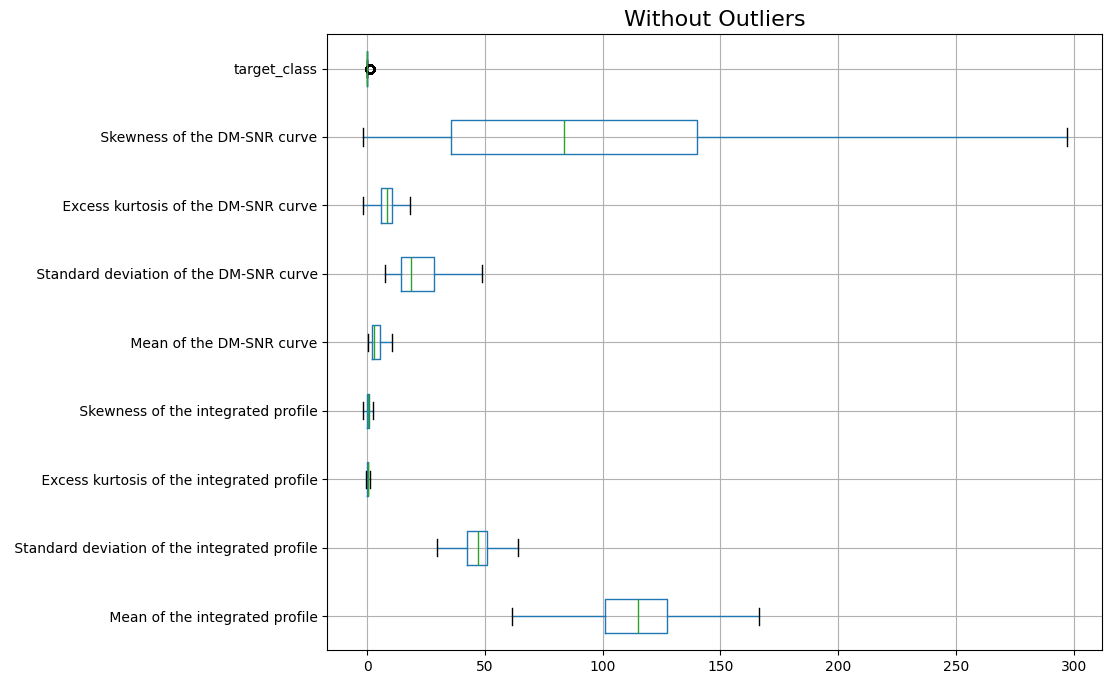

In [68]:
plt.figure(figsize=(10,8))
plt.title('Without Outliers',fontsize=16)
ps_train_out.boxplot(vert=0)

## Feature Selection

We will check for multicolliearity using 2 ways:
1. Correlation Plot
2. VIF (Variance Inflation factor)

<Axes: >

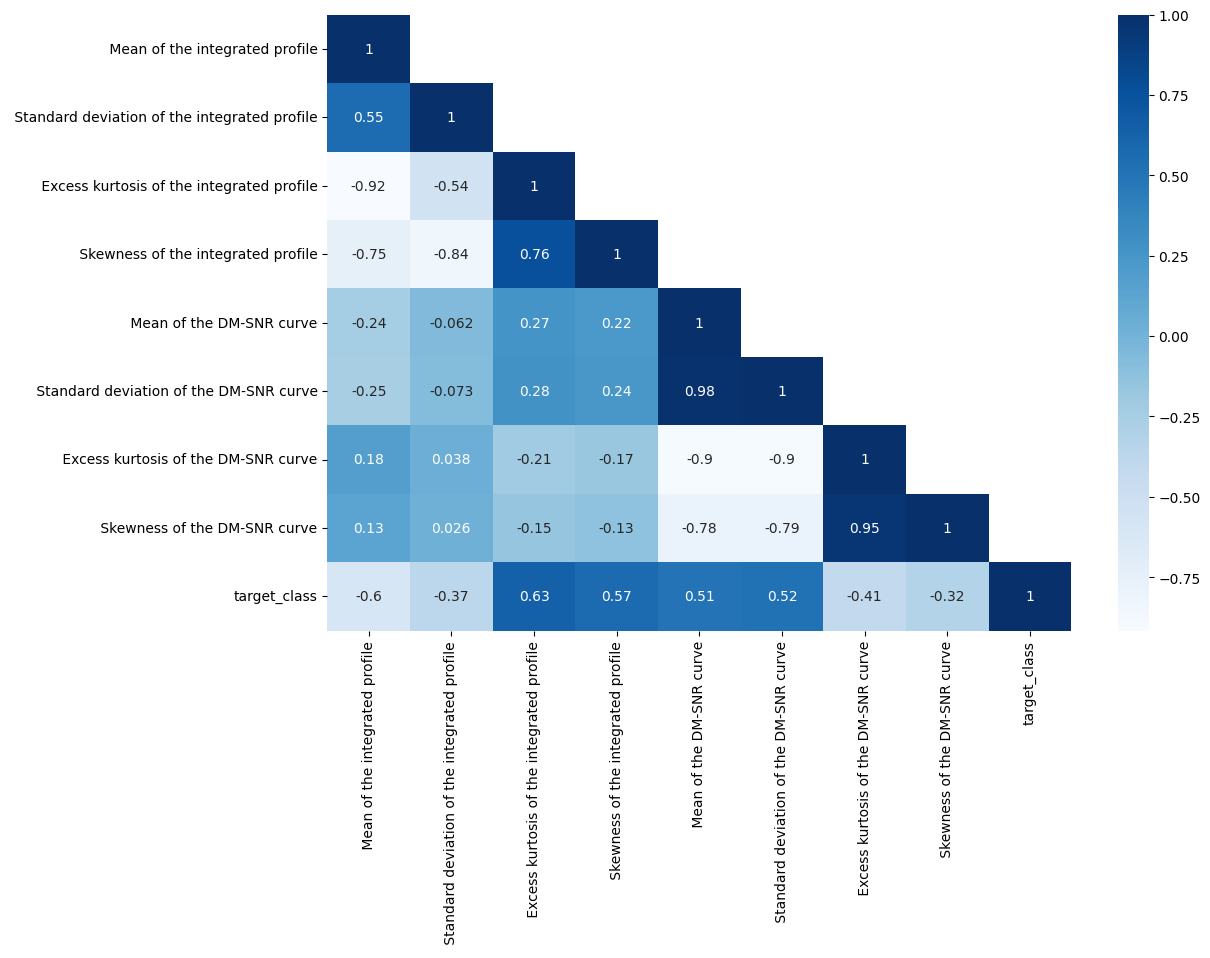

In [69]:
# Correlation plot after outlier treatment
plt.figure(figsize=(12,8))
sns.heatmap(ps_train_out.corr(),annot=True, cmap='Blues',mask=np.triu(ps_train_out.corr(),+1))

There is multicolliearity among the variables, we can either remove some variables or leave them as it is. Feature extraction is not desired since there are only 8 independent variables. Trial and error would be required to drop variables.

We can observe that **Mean of the DM-SNR curve** and **standard deviation of the DM-SNR curve** are highly correlated **(0.97)** and its correlation values with other variables and even the target are almost similar. Hence we can remove any 1 of them to reduce redundancy.

<Axes: >

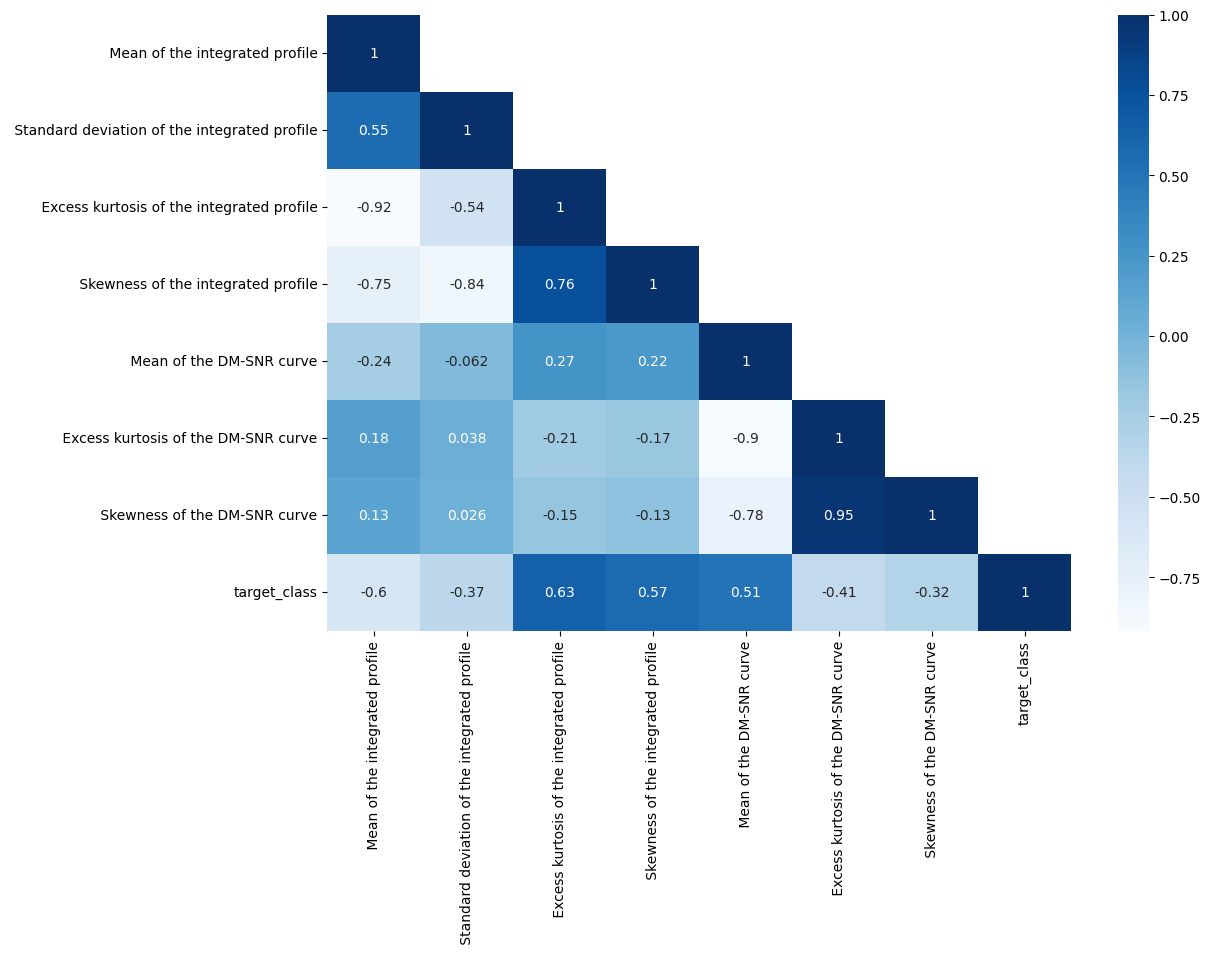

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(ps_train_out.drop(' Standard deviation of the DM-SNR curve',axis=1).corr(),annot=True, cmap='Blues',mask=np.triu(ps_train_out.drop([' Standard deviation of the DM-SNR curve'],axis=1).corr(),+1))

Also, **Excess kurtosis of the DM-SNR curve** and **Skewness of the DM-SNR curve** are also highly correlated **(0.95)**, and its correlation values with other variables and even the target are almost similar. We remove the Excess kurtosis of the DM-SNR curve.

<Axes: >

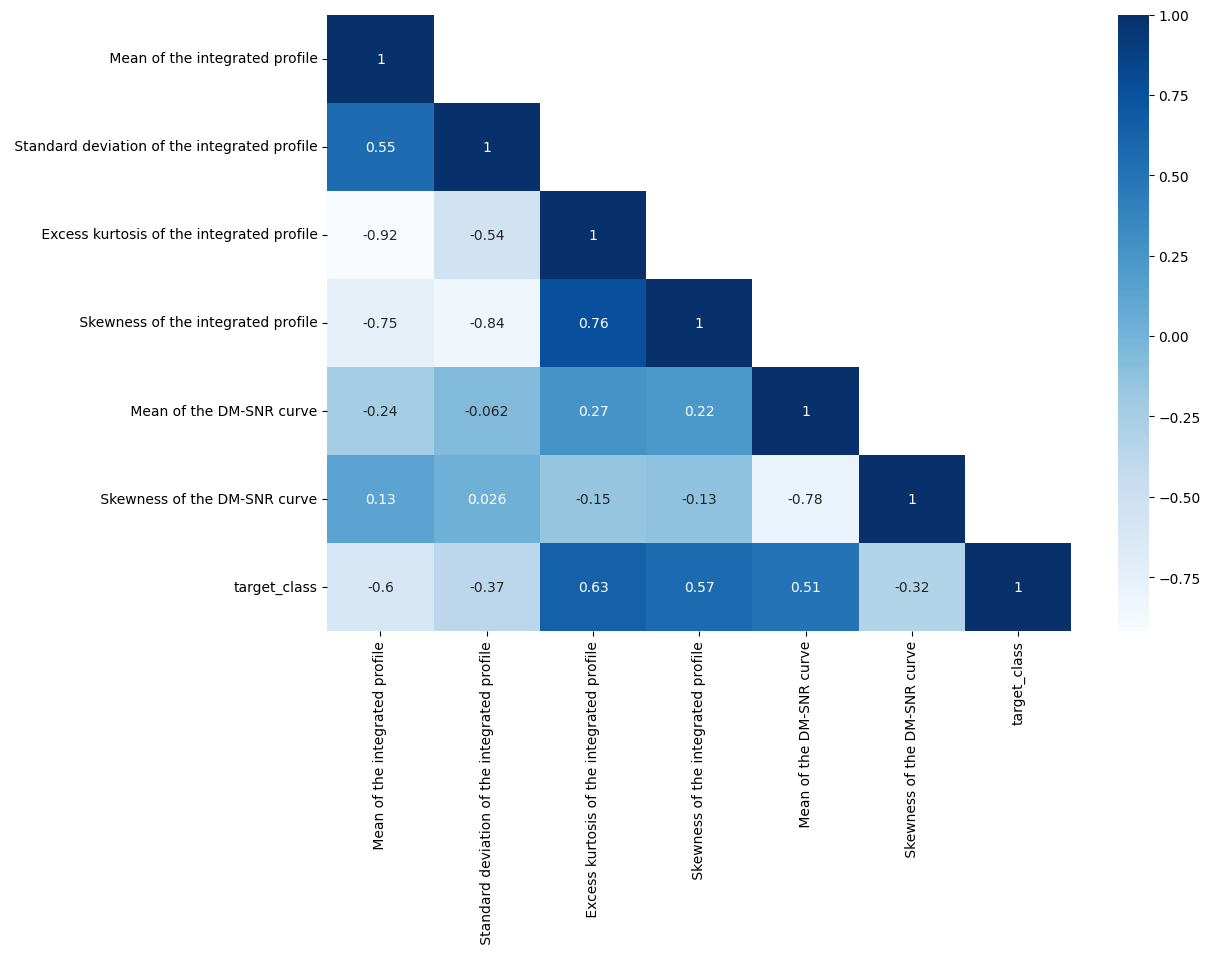

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(ps_train_out.drop([' Standard deviation of the DM-SNR curve',' Excess kurtosis of the DM-SNR curve'],axis=1).corr(),annot=True, cmap='Blues',mask=np.triu(ps_train_out.drop([' Standard deviation of the DM-SNR curve',' Excess kurtosis of the DM-SNR curve'],axis=1).corr(),+1))

**Variance Inflation Factor** — Variance inflation factor (VIF) is the quotient of the variance in a model with multiple terms by the variance of a model with one term alone. It quantifies the severity of multicollinearity in an ordinary least squares regression analysis. VIF value can be interpreted as

1 (Non-collinear)

1–5 (Medium collinear)

More than 5 (Highly collinear)

In [72]:
pip install statsmodels

Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.


In [73]:
# VIF of all variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = ps_train_out.drop('target_class', axis=1)
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
  print (column ,"--->",  vif[i])
  i = i+1

 Mean of the integrated profile ---> 113.37891735099838
 Standard deviation of the integrated profile ---> 123.74800228893828
 Excess kurtosis of the integrated profile ---> 9.487134685884826
 Skewness of the integrated profile ---> 5.867991099500478
 Mean of the DM-SNR curve ---> 93.3530721199419
 Standard deviation of the DM-SNR curve ---> 139.1837321467855
 Excess kurtosis of the DM-SNR curve ---> 121.50239470300843
 Skewness of the DM-SNR curve ---> 34.113507381479906


In [74]:
# VIF after removing Excess kurtosis of the DM-SNR curve and Standard deviation of the DM-SNR curve
X1 = ps_train_out.drop(['target_class',' Excess kurtosis of the DM-SNR curve',' Standard deviation of the DM-SNR curve'], axis=1)

i=0
for column in X1.columns:
  print (column ,"--->",  vif[i])
  i = i+1

 Mean of the integrated profile ---> 113.37891735099838
 Standard deviation of the integrated profile ---> 123.74800228893828
 Excess kurtosis of the integrated profile ---> 9.487134685884826
 Skewness of the integrated profile ---> 5.867991099500478
 Mean of the DM-SNR curve ---> 93.3530721199419
 Skewness of the DM-SNR curve ---> 139.1837321467855


**Our Approach in this case for feature selection:**

If we are interested in the effects of the predictor variables to the target and the interpretability of the model, then treating collinearity is necessary. But If we are interested about the predictive abilities of a model, then we can skip it and follow regular machine learning flows.

In this problem interpretibility is not that necessary but model performance and predictablility should be high. Keeping this in mind we can select ML models which can give high performance even though interpretibility is less, so will be continuing with all features and ignoring the correlation among variables to start with.

But to check if performance of models can be further enhanced we can remove very the above highly correlated features and check again.

# Splitting in Train and test set

In [75]:
X = ps_train_out.drop('target_class',axis=1)
y = ps_train_out[['target_class']]

In [76]:
from sklearn.model_selection import train_test_split

# Keeping test size as 30% of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

Since the data is not scaled, will will apply fit_transform on training data and transform the test data. Not applying scaling on y_train and y_test since their values are already 0 and 1.

In [77]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 
# Scaling the data
X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

# **Building Models**

## **Decision Tree**

### Base Model

In [78]:
# Building base Model
DT = DecisionTreeClassifier(random_state=1) #random state given for consistency in results
DT.fit(X_trains, y_train)

DecisionTreeClassifier(random_state=1)

In [79]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, DT.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, DT.predict(X_tests)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7960
         1.0       1.00      1.00      1.00       809

    accuracy                           1.00      8769
   macro avg       1.00      1.00      1.00      8769
weighted avg       1.00      1.00      1.00      8769
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3415
         1.0       0.78      0.83      0.80       344

    accuracy                           0.96      3759
   macro avg       0.88      0.90      0.89      3759
weighted avg       0.96      0.96      0.96      3759
 



In [80]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(DT, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(DT, X_test, y_test, cv=10)))

Train set CV scores: 0.9650 

Test set CV scores: 0.9620


We can see the accuracy of train set is 100% and test set is 96%. Although difference in accuarices is less still it is an overfit model and this is not desirable. Also, the precision, recall and f1-score values are way different of train and test set. So we will try to tune the models in an attempt to converge their performances and increase the performance in terms of precision, recall and f1-score.

### Randomized Search CV

In [83]:
DT_param_random = [    
    {
        'splitter': ['best', 'random'],
        'max_features': list(range(1, X_train.shape[1])),
        'max_depth': np.arange(1, 33, 1),  # Use np.arange to generate integer values
        'min_samples_leaf': randint(1, 1000),  # 1-3% of length of dataset
        'min_samples_split': randint(300, 5000),  # approx 3 times the min_samples_leaf
        "criterion": ["gini", "entropy"]
    }
]

DT_random1 = RandomizedSearchCV(DT, param_distributions=DT_param_random, cv=5, verbose=True, n_jobs=-1)



We took the range of values as specified above. Used CV k value as 5.

In [84]:
DT_random1.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
                                         'max_features': [1, 2, 3, 4, 5, 6, 7],
                                         'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f029ccdabd0>,
                                         'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f029ccda950>,
                                         'splitter': ['best', 'random']}],
                   verbose=True)

In [85]:
# Checking the best estimator values
DT_random1.best_estimator_

DecisionTreeClassifier(max_depth=np.int64(2), max_features=7,
                       min_samples_leaf=513, min_samples_split=1785,
                       random_state=1)

In [87]:
# Best Random Model
DT_random = DecisionTreeClassifier(max_depth=5,max_features=4,min_samples_leaf=525, min_samples_split=2593,criterion='entropy',random_state=1)
DT_random.fit(X_trains, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=4,
                       min_samples_leaf=525, min_samples_split=2593,
                       random_state=1)

In [88]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, DT_random.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, DT_random.predict(X_tests)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      7960
         1.0       0.90      0.83      0.86       809

    accuracy                           0.98      8769
   macro avg       0.94      0.91      0.93      8769
weighted avg       0.98      0.98      0.98      8769
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3415
         1.0       0.89      0.86      0.87       344

    accuracy                           0.98      3759
   macro avg       0.94      0.92      0.93      3759
weighted avg       0.98      0.98      0.98      3759
 



In [89]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(DT_random, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(DT_random, X_test, y_test, cv=10)))

Train set CV scores: 0.9756 

Test set CV scores: 0.9215


We can clearly see by comparing the F1-score values of train and test set(as it takes into account both recall and precision) that the model is not overfit anymore. 

The recall values for test set have improved from 83% to 86% from base model with accuracy of 98% for both train and test sets. The test set has performed slightly better than train set.

### Grid Search CV

In [90]:
DT_param_grid = [    
    {'splitter' : ['best', 'random'],
     'max_features' : [4,5,6],
     'max_depth' : [20,30,40],
     'min_samples_leaf' : [100,200,300], # 1-3% of total dataset
     'min_samples_split' : [300, 400, 500], # approx 3 times the min_samples_leaf
     "criterion": ["gini", "entropy"]
    }
]

DT_grid1 = GridSearchCV(DT, param_grid = DT_param_grid, cv = 5, verbose=False, n_jobs=-1)

In [91]:
DT_grid1.fit(X_trains, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [20, 30, 40], 'max_features': [4, 5, 6],
                          'min_samples_leaf': [100, 200, 300],
                          'min_samples_split': [300, 400, 500],
                          'splitter': ['best', 'random']}],
             verbose=False)

In [92]:
DT_grid1.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=4,
                       min_samples_leaf=100, min_samples_split=300,
                       random_state=1)

In [93]:
# Best Grid Model
DT_grid = DecisionTreeClassifier(max_depth=20,max_features=4,min_samples_leaf=100, min_samples_split=300,criterion='entropy',random_state=1)
DT_grid.fit(X_trains, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=4,
                       min_samples_leaf=100, min_samples_split=300,
                       random_state=1)

In [94]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, DT_grid.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, DT_grid.predict(X_tests)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      7960
         1.0       0.90      0.83      0.86       809

    accuracy                           0.98      8769
   macro avg       0.94      0.91      0.93      8769
weighted avg       0.98      0.98      0.98      8769
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3415
         1.0       0.89      0.86      0.87       344

    accuracy                           0.98      3759
   macro avg       0.94      0.92      0.93      3759
weighted avg       0.98      0.98      0.98      3759
 



In [95]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(DT_grid, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(DT_grid, X_test, y_test, cv=10)))

Train set CV scores: 0.9756 

Test set CV scores: 0.9779


Tried few iterations with different values in grid search I was getting the same results. I guess this is the maximum performance that can be achieved for Decision Tree model. 

**Since the CV values and performance is best for Grid search model, it will be considered as final Decision Tree Model.**

In [96]:
# Prediction for final model
DT_train_predict = DT_grid.predict(X_trains)
DT_test_predict = DT_grid.predict(X_tests)

# Probability Prediction for final model
DT_prob_train = DT_grid.predict_proba(X_trains)
DT_prob_test = DT_grid.predict_proba(X_tests)

# AUC score for final model
DT_train_auc = metrics.roc_auc_score(y_train,DT_prob_train[:,1])
DT_test_auc = metrics.roc_auc_score(y_test,DT_prob_test[:,1])

In [97]:
# Classification report in a dataframe of final model
DT_df_train=pd.DataFrame(classification_report(y_train, DT_train_predict,output_dict=True)).transpose()
DT_df_test=pd.DataFrame(classification_report(y_test, DT_test_predict,output_dict=True)).transpose()

## **Random Forest**

### Base Model

In [98]:
# Building base Model
RF = RandomForestClassifier(random_state=1) 
RF.fit(X_trains, y_train)

RandomForestClassifier(random_state=1)

In [99]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, RF.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, RF.predict(X_tests)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7960
         1.0       1.00      1.00      1.00       809

    accuracy                           1.00      8769
   macro avg       1.00      1.00      1.00      8769
weighted avg       1.00      1.00      1.00      8769
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3415
         1.0       0.91      0.83      0.87       344

    accuracy                           0.98      3759
   macro avg       0.95      0.91      0.93      3759
weighted avg       0.98      0.98      0.98      3759
 



In [100]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(RF, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(RF, X_test, y_test, cv=10)))

Train set CV scores: 0.9765 

Test set CV scores: 0.9790


We can see the accuracy of train set is 100% and test set is 98%. Although difference in accuarices is less still it is an overfit model and this is not desirable. Also, the precision, recall and f1-score values are way different of train and test set. So we will try to tune the models in an attempt to converge their performances and increase the performance in terms of precision, recall and f1-score.

### Randomized Search CV

In [103]:
RF_param_random = [
    {
        'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [int(x) for x in np.linspace(1, 32, 32, endpoint=True)],  # Ensure integer values
        'min_samples_leaf': randint(1, 300),  # 1-3% of length of dataset
        'min_samples_split': randint(300, 3000),  # approx 3 times the min_samples_leaf
        'bootstrap': [True, False]
    }
]

RF_random1 = RandomizedSearchCV(
    estimator=RF,
    param_distributions=RF_param_random,
    cv=5,
    n_jobs=-1
)
RF_random1.fit(X_trains, y_train)


/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarni

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19, 20,
                                                       21, 22, 23, 24, 25, 26,
                                                       27, 28, 29, 30, ...],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f02cfca8d90>,
                                         'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f02cfb593d0>,
                                         'n_estimators': [200, 400, 600, 800,
                                                          1000, 1200, 1400,
                                                          1600, 1800, 2000]}])

In [104]:
RF_random1.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=14, min_samples_leaf=266,
                       min_samples_split=714, n_estimators=1600,
                       random_state=1)

In [106]:
# Best Random Model
RF_random = RandomForestClassifier(max_depth=20,max_features='sqrt',min_samples_leaf=66, min_samples_split=511,criterion='gini',n_estimators=1400,random_state=1)
RF_random.fit(X_trains, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=66, min_samples_split=511,
                       n_estimators=1400, random_state=1)

In [107]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, RF_random.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, RF_random.predict(X_tests)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      7960
         1.0       0.92      0.81      0.86       809

    accuracy                           0.98      8769
   macro avg       0.95      0.90      0.92      8769
weighted avg       0.98      0.98      0.98      8769
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3415
         1.0       0.91      0.84      0.87       344

    accuracy                           0.98      3759
   macro avg       0.95      0.92      0.93      3759
weighted avg       0.98      0.98      0.98      3759
 



In [108]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(RF_random, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(RF_random, X_test, y_test, cv=10)))

Train set CV scores: 0.9748 

Test set CV scores: 0.9774


We can clearly see by comparing the F1-score values of train and test set(as it takes into account both recall and precision) that the model is not overfit anymore. 

The recall values for test set is constant at 83% as compared to base model with accuracy of 98% for both train and test sets. The test set has performed slightly better than train set.

### Grid Search CV

In [109]:
RF_param_grid = [    
    {'n_estimators': [300,400],
     'max_features' : [3,4],
     'max_depth' : [15,20],
     'min_samples_leaf' : [100,200], # 1-3% of length of dataset
     'min_samples_split' : [300,400] # approx 3 times the min_samples_leaf
    }
]

RF_grid1 = GridSearchCV(RF, param_grid = RF_param_grid, cv = 3, n_jobs=-1)

In [110]:
RF_grid1.fit(X_trains, y_train) 

/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarni

/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarni

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid=[{'max_depth': [15, 20], 'max_features': [3, 4],
                          'min_samples_leaf': [100, 200],
                          'min_samples_split': [300, 400],
                          'n_estimators': [300, 400]}])

In [112]:
RF_grid1.best_estimator_

RandomForestClassifier(max_depth=15, max_features=3, min_samples_leaf=100,
                       min_samples_split=300, n_estimators=300, random_state=1)

In [113]:
# Best Grid Model
RF_grid = RandomForestClassifier(max_depth=15,max_features=3,min_samples_leaf=100, min_samples_split=300,criterion='gini',n_estimators=300,random_state=1)
RF_grid.fit(X_trains, y_train)

RandomForestClassifier(max_depth=15, max_features=3, min_samples_leaf=100,
                       min_samples_split=300, n_estimators=300, random_state=1)

In [114]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, RF_grid.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, RF_grid.predict(X_tests)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      7960
         1.0       0.91      0.82      0.87       809

    accuracy                           0.98      8769
   macro avg       0.95      0.91      0.93      8769
weighted avg       0.98      0.98      0.98      8769
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3415
         1.0       0.90      0.85      0.87       344

    accuracy                           0.98      3759
   macro avg       0.94      0.92      0.93      3759
weighted avg       0.98      0.98      0.98      3759
 



In [115]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(RF_grid, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(RF_grid, X_test, y_test, cv=10)))

Train set CV scores: 0.9759 

Test set CV scores: 0.9779


There is no much improvement in performance for the test set.
Though the model is not overfitting after tuning. 

**Since the CV values and performance time is best for Random search model, it will be considered as final Random Forest Model.**

In [116]:
# Prediction for final model
RF_train_predict = RF_random.predict(X_trains)
RF_test_predict = RF_random.predict(X_tests)

# Probability Prediction for final model
RF_prob_train = RF_random.predict_proba(X_trains)
RF_prob_test = RF_random.predict_proba(X_tests)

# AUC score for final model
RF_train_auc = metrics.roc_auc_score(y_train,RF_prob_train[:,1])
RF_test_auc = metrics.roc_auc_score(y_test,RF_prob_test[:,1])

In [117]:
# Classification report in a dataframe of final model
RF_df_train=pd.DataFrame(classification_report(y_train, RF_train_predict,output_dict=True)).transpose()
RF_df_test=pd.DataFrame(classification_report(y_test, RF_test_predict,output_dict=True)).transpose()

## **Logistic Regression**

### Base Model

In [118]:
# Building base model
LR = LogisticRegression(random_state = 1)
LR.fit(X_trains, y_train)

LogisticRegression(random_state=1)

In [119]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, LR.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, LR.predict(X_tests)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      7960
         1.0       0.90      0.83      0.86       809

    accuracy                           0.98      8769
   macro avg       0.94      0.91      0.92      8769
weighted avg       0.98      0.98      0.98      8769
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3415
         1.0       0.88      0.86      0.87       344

    accuracy                           0.98      3759
   macro avg       0.94      0.93      0.93      3759
weighted avg       0.98      0.98      0.98      3759
 



In [120]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(LR, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(LR, X_test, y_test, cv=10)))

Train set CV scores: 0.9743 

Test set CV scores: 0.9769


### Randomized Search CV

In [121]:
LR_param_random = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'None'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

LR_random1 = RandomizedSearchCV(LR, param_distributions = LR_param_random, cv = 5, n_jobs=-1)

In [122]:
LR_random1.fit(X_trains,y_train)

/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ng/miniconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversio

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=1),
                   n_jobs=-1,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}])

In [123]:
LR_random1.best_estimator_

LogisticRegression(C=np.float64(206.913808111479), max_iter=2500,
                   random_state=1)

In [126]:
# Best Random model
LR_random = LogisticRegression(C=1.623776739188721,penalty='None', solver='newton-cg',max_iter=100, random_state = 1)
LR_random.fit(X_trains,y_train)

InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l2', 'elasticnet', 'l1'} or None. Got 'none' instead.

In [127]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, LR_random.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, LR_random.predict(X_tests)),'\n')

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(LR_random, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(LR_random, X_test, y_test, cv=10)))

### Grid Search CV

In [ ]:
LR_param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'None'],
    'C' : [0.00001],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

LR_grid1 = GridSearchCV(LR, param_grid = LR_param_grid, cv = 5, n_jobs=-1)

In [ ]:
LR_grid1.fit(X_trains, y_train) 

In [ ]:
LR_grid1.best_estimator_

In [ ]:
# Best Grid model
LR_grid = LogisticRegression(C=1e-05,penalty='none', solver='lbfgs',max_iter=100, random_state = 1)
LR_grid.fit(X_trains,y_train)

In [ ]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, LR_grid.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, LR_grid.predict(X_tests)),'\n')

In [ ]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(LR_grid, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(LR_grid, X_test, y_test, cv=10)))

The performance of tuned model is slighly better than base model. The test set has performed slightly better than train set and is not overfit anymore.

**Since the CV values and performance time is best for Random search model, it will be considered as final Logistic Regression Model.**

In [ ]:
# Prediction for final model
LR_train_predict = LR_random.predict(X_trains)
LR_test_predict = LR_random.predict(X_tests)

# Probability Prediction for final model
LR_prob_train = LR_random.predict_proba(X_trains)
LR_prob_test = LR_random.predict_proba(X_tests)

# AUC score for final model
LR_train_auc = metrics.roc_auc_score(y_train,LR_prob_train[:,1])
LR_test_auc = metrics.roc_auc_score(y_test,LR_prob_test[:,1])

In [ ]:
# Classification report in a dataframe of final model
LR_df_train=pd.DataFrame(classification_report(y_train, LR_train_predict,output_dict=True)).transpose()
LR_df_test=pd.DataFrame(classification_report(y_test, LR_test_predict,output_dict=True)).transpose()

## **Naive Bayes**

### Base Model

In [ ]:
# Building base Model
NB = GaussianNB()
NB.fit(X_trains, y_train)

In [ ]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, NB.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, NB.predict(X_tests)),'\n')

In [ ]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(NB, X_trains, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(NB, X_tests, y_test, cv=10)))

The model has performeed very well in terms of performance and the cross validation scores are also very consistent.

The performances of train and test set are consistent with each other which also implies the model is not overfitting.


In [ ]:
# Prediction for final model
NB_train_predict = NB.predict(X_trains)
NB_test_predict = NB.predict(X_tests)

# Probability Prediction for final model
NB_prob_train = NB.predict_proba(X_trains)
NB_prob_test = NB.predict_proba(X_tests)

# AUC score for final model
NB_train_auc = metrics.roc_auc_score(y_train,NB_prob_train[:,1])
NB_test_auc = metrics.roc_auc_score(y_test,NB_prob_test[:,1])

In [ ]:
# Classification report in a dataframe of final model
NB_df_train=pd.DataFrame(classification_report(y_train, NB_train_predict,output_dict=True)).transpose()
NB_df_test=pd.DataFrame(classification_report(y_test, NB_test_predict,output_dict=True)).transpose()

## **XGBoost**

### Base Model

In [ ]:
# Building base Model
XGB=xgb.XGBClassifier(random_state=1)
XGB.fit(X_trains, y_train)

In [ ]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, XGB.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, XGB.predict(X_tests)),'\n')

In [ ]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(XGB, X_trains, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(XGB, X_tests, y_test, cv=10)))

The model has performed well in terms of performance and the cross validation scores are also very consistent.

The performances of train and test set are consistent with each other which also implies the model is not overfitting. We will try to tune the model and see if the recall can be improved or not.


#### Randomized Search CV

In [ ]:
XGB_param_random = [    
    {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
     'max_depth' : [int(x) for x in np.linspace(1, 32, 32, endpoint=True)],
     'subsample': np.linspace(start = 0.00001, stop = 0.9, num = 20),
      'gamma': np.linspace(start = 0.00001, stop = 0.9, num = 20),
      'colsample_bytree': [0.2,0.4,0.6,0.8,1.0],
     'learning_rate': np.linspace(start = 0.00001, stop = 0.1, num = 20)
    }
]

XGB_random1 = RandomizedSearchCV(XGB, param_distributions = XGB_param_random, cv = 5, n_jobs=-1)

In [ ]:
XGB_random1.fit(X_trains, y_train)

In [ ]:
XGB_random1.best_estimator_

In [ ]:
# Best Random model
XGB_random = xgb.XGBClassifier(colsample_bytree=1.0,gamma=0.09474578947368421,n_estimators=1400,max_depth=15,subsample=0.14211368421052634, learning_rate=0.005272631578947368, random_state=1)
XGB_random.fit(X_trains, y_train)

In [ ]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, XGB_random.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, XGB_random.predict(X_tests)),'\n')

In [ ]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(XGB_random, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(XGB_random, X_test, y_test, cv=10)))

The model performance has not improved as compared to base model. Also it was taking a lot of execution time too.

**So to save time, resources and get better performance the base model will be considered as final model for xgboost.**

In [ ]:
# Prediction for final model
XGB_train_predict = XGB.predict(X_trains)
XGB_test_predict = XGB.predict(X_tests)

# Probability Prediction for final model
XGB_prob_train = XGB.predict_proba(X_trains)
XGB_prob_test = XGB.predict_proba(X_tests)

# AUC score for final model
XGB_train_auc = metrics.roc_auc_score(y_train,XGB_prob_train[:,1])
XGB_test_auc = metrics.roc_auc_score(y_test,XGB_prob_test[:,1])

In [ ]:
# Classification report in a dataframe of final model
XGB_df_train=pd.DataFrame(classification_report(y_train, XGB_train_predict,output_dict=True)).transpose()
XGB_df_test=pd.DataFrame(classification_report(y_test, XGB_test_predict,output_dict=True)).transpose()

## **Support Vector Machine**

### Base Model

In [ ]:
# Building base Model
SVM = svm.SVC(random_state=1).fit(X_trains, y_train)

In [ ]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, SVM.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, SVM.predict(X_tests)),'\n')

In [ ]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(SVM, X_trains, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(SVM, X_tests, y_test, cv=10)))

The model has performed well in terms of performance and the cross validation scores are also very consistent.

The performances of train and test set are exactly same as each other which also implies the model is not overfitting. We will try to tune the model and see if the recall can be improved or not.


### Randomized Search CV

In [ ]:
SVM_param_random = {'C': [0.01,0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf'],
              'tol':[0.01,0.001,0.0001],
              'degree': [2,3,4,5]}  #,'linear','poly', 'sigmoid', 'precomputed'

SVM_random1 = RandomizedSearchCV(SVM, param_distributions = SVM_param_random, cv = 5, n_jobs=-1)

In [ ]:
SVM_random1.fit(X_trains, y_train) 

In [ ]:
SVM_random1.best_estimator_

In [ ]:
# Best Random model
SVM_random = svm.SVC(C=1,degree=2, gamma=0.1, kernel='rbf',tol=0.001, random_state=1)
SVM_random.fit(X_trains, y_train)

In [ ]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, SVM_random.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, SVM_random.predict(X_tests)),'\n')

In [ ]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(SVM_random, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(SVM_random, X_test, y_test, cv=10)))

### Grid Search CV

In [ ]:
SVM_param_grid = {'C': [0.01,0.1, 1, 10],  
              'gamma': [0.09, 0.1, 0.2, 0.001], 
              'kernel': ['rbf'],
              'tol':[0.001,0.0001],
              'degree':[2,3]}

SVM_grid1 = GridSearchCV(SVM, param_grid = SVM_param_grid, cv = 5, n_jobs=-1)

In [ ]:
SVM_grid1.fit(X_trains, y_train) 

In [ ]:
SVM_grid1.best_estimator_

In [ ]:
# Best Random model
SVM_grid = svm.SVC(C=10,degree=2, gamma=0.09, kernel='rbf',tol=0.001, random_state=1)
SVM_grid.fit(X_trains, y_train)

In [ ]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, SVM_grid.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, SVM_grid.predict(X_tests)),'\n')

In [ ]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(SVM_grid, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(SVM_grid, X_test, y_test, cv=10)))

**Tuning hasn't improved the performance of models and the cross validation scores have reduced too. So to the best performing model for SVM is the base model.**

In [ ]:
# Prediction for final model
SVM_train_predict = SVM.predict(X_trains)
SVM_test_predict = SVM.predict(X_tests)

In [ ]:
# Classification report in a dataframe of final model
SVM_df_train=pd.DataFrame(classification_report(y_train, SVM_train_predict,output_dict=True)).transpose()
SVM_df_test=pd.DataFrame(classification_report(y_test, SVM_test_predict,output_dict=True)).transpose()

# **Comparison of Models**

## Confusion Matrix

In [ ]:
models = {"DT_grid":DT_grid, "RF_random":RF_random, "LR_random":LR_random, "NB":NB, "XGB":XGB, "SVM":SVM}

In [ ]:
model = [DT_grid, RF_random, LR_random, NB, XGB, SVM]
model_name = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Naive Bayes', 'XGBoost', 'SVM']

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=6,  figsize=(25, 20))
fig.subplots_adjust(wspace=0.8)
idx = 0
for m,n in zip(model,model_name):
  plot_confusion_matrix(m,X_trains,y_train,cmap='Greys',display_labels=['Non Pulsars','Pulsars'],values_format = '.0f', ax=axes[0][idx]);
  axes[0][idx].set_title("Train of " + n)
  plot_confusion_matrix(m,X_tests,y_test,cmap='Greys',display_labels=['Non Pulsars','Pulsars'],values_format = '.0f', ax=axes[1][idx]);
  axes[1][idx].set_title("Test of " + n)
  idx=idx+1

**1**: Pulsars             **0**: Non Pulsars

**TP**: The predicted pulsar is actually a pulsar

**TN**: The predicted non pulsar is actually a non pulsar

**FP**: A true non pulsar is predicted as pulsar

**FN**: A true pulsar is predicted as non pulsar

The true positive should be high, and errors should be minimum

**The highest is for XGBoost, followed by Random Forest and SVM for both train and test sets**

## Important Metrics Comparison

In [ ]:
# Creating a dataframe with 'Accuracy', 'AUC', 'Recall','Precision','F1 Score' values for all models

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'DT Train':[DT_df_train.loc["accuracy"][0],DT_train_auc,DT_df_train.loc["1.0"][1],DT_df_train.loc["1.0"][0],DT_df_train.loc["1.0"][2]],
                     'DT Test':[DT_df_test.loc["accuracy"][0],DT_test_auc,DT_df_test.loc["1.0"][1],DT_df_test.loc["1.0"][0],DT_df_test.loc["1.0"][2]],
                     'RF Train':[RF_df_train.loc["accuracy"][0],RF_train_auc,RF_df_train.loc["1.0"][1],RF_df_train.loc["1.0"][0],RF_df_train.loc["1.0"][2]],
                     'RF Test':[RF_df_test.loc["accuracy"][0],RF_test_auc,RF_df_test.loc["1.0"][1],RF_df_test.loc["1.0"][0],RF_df_test.loc["1.0"][2]],
                     'LR Train':[LR_df_train.loc["accuracy"][0],LR_train_auc,LR_df_train.loc["1.0"][1],LR_df_train.loc["1.0"][0],LR_df_train.loc["1.0"][2]],
                     'LR Test':[LR_df_test.loc["accuracy"][0],LR_test_auc,LR_df_test.loc["1.0"][1],LR_df_test.loc["1.0"][0],LR_df_test.loc["1.0"][2]],
                     'NB Train':[NB_df_train.loc["accuracy"][0],NB_train_auc,NB_df_train.loc["1.0"][1],NB_df_train.loc["1.0"][0],NB_df_train.loc["1.0"][2]],
                     'NB Test':[NB_df_test.loc["accuracy"][0],NB_test_auc,NB_df_test.loc["1.0"][1],NB_df_test.loc["1.0"][0],NB_df_test.loc["1.0"][2]],
                     'XGB Train':[XGB_df_train.loc["accuracy"][0],XGB_train_auc,XGB_df_train.loc["1.0"][1],XGB_df_train.loc["1.0"][0],XGB_df_train.loc["1.0"][2]],
                     'XGB Test':[XGB_df_test.loc["accuracy"][0],XGB_test_auc,XGB_df_test.loc["1.0"][1],XGB_df_test.loc["1.0"][0],XGB_df_test.loc["1.0"][2]],
                     'SVM Train':[SVM_df_train.loc["accuracy"][0],0,SVM_df_train.loc["1.0"][1],SVM_df_train.loc["1.0"][0],SVM_df_train.loc["1.0"][2]],
                     'SVM Test':[SVM_df_test.loc["accuracy"][0],0,SVM_df_test.loc["1.0"][1],SVM_df_test.loc["1.0"][0],SVM_df_test.loc["1.0"][2]]
                     },index=index)
data = round(data,3)

In [ ]:
data

In [ ]:
data1 = data.T
data1['Model'] = data1.index 
data1 = data1.reset_index()

In [ ]:
# Accuracy of Train
plt.figure(figsize = (15,10))
graph = sns.barplot(x = 'Model', y = 'Accuracy',data = data1.iloc[[0,2,4,6,8,10]])

for p in graph.patches:
        graph.annotate('{:.3f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [ ]:
# Accuracy of Test
plt.figure(figsize = (15,10))
graph = sns.barplot(x = 'Model', y = 'Accuracy',data = data1.iloc[[1,3,5,7,9,11]])

for p in graph.patches:
        graph.annotate('{:.3f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [ ]:
# F1-score of Train
plt.figure(figsize = (15,10))
graph = sns.barplot(x = 'Model', y = 'F1 Score',data = data1.iloc[[0,2,4,6,8,10]])

for p in graph.patches:
        graph.annotate('{:.3f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [ ]:
# F1-score of Test
plt.figure(figsize = (15,10))
graph = sns.barplot(x = 'Model', y = 'F1 Score',data = data1.iloc[[1,3,5,7,9,11]])

for p in graph.patches:
        graph.annotate('{:.3f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [ ]:
# AUC of Train
plt.figure(figsize = (15,10))
graph = sns.barplot(x = 'Model', y = 'AUC',data = data1.iloc[[0,2,4,6,8]])

for p in graph.patches:
        graph.annotate('{:.3f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [ ]:
# AUC of Test
plt.figure(figsize = (15,10))
graph = sns.barplot(x = 'Model', y = 'AUC',data = data1.iloc[[1,3,5,7,9]])

for p in graph.patches:
        graph.annotate('{:.3f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

## ROC Curve

In [ ]:
DT_train_fpr, DT_train_tpr, thresholds = metrics.roc_curve(y_train,DT_prob_train[:,1])
DT_test_fpr, DT_test_tpr, thresholds = metrics.roc_curve(y_test,DT_prob_test[:,1])
RF_train_fpr, RF_train_tpr, thresholds = metrics.roc_curve(y_train,RF_prob_train[:,1])
RF_test_fpr, RF_test_tpr, thresholds = metrics.roc_curve(y_test,RF_prob_test[:,1])
LR_train_fpr, LR_train_tpr, thresholds = metrics.roc_curve(y_train,LR_prob_train[:,1])
LR_test_fpr, LR_test_tpr, thresholds = metrics.roc_curve(y_test,LR_prob_test[:,1])
NB_train_fpr, NB_train_tpr, thresholds = metrics.roc_curve(y_train,NB_prob_train[:,1])
NB_test_fpr, NB_test_tpr, thresholds = metrics.roc_curve(y_test,NB_prob_test[:,1])
XGB_train_fpr, XGB_train_tpr, thresholds = metrics.roc_curve(y_train,XGB_prob_train[:,1])
XGB_test_fpr, XGB_test_tpr, thresholds = metrics.roc_curve(y_test,XGB_prob_test[:,1])

**For Training Data**

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(DT_train_fpr,DT_train_tpr,color='crimson',label="DT")
plt.plot(RF_train_fpr,RF_train_tpr,color='black',label="RF")
plt.plot(LR_train_fpr, LR_train_tpr,color='r',label="LR")
plt.plot(NB_train_fpr,NB_train_tpr,color='c',label="NB")
plt.plot(XGB_train_fpr,XGB_train_tpr,color='gray',label="XGB")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training Data')
plt.legend(loc=0)

**For Testing Data**

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(DT_test_fpr,DT_test_tpr,color='crimson',label="DT")
plt.plot(RF_test_fpr,RF_test_tpr,color='black',label="RF")
plt.plot(LR_test_fpr, LR_test_tpr,color='r',label="LR")
plt.plot(NB_test_fpr,NB_test_tpr,color='c',label="NB")
plt.plot(XGB_test_fpr,XGB_test_tpr,color='gray',label="XGB")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing Data')
plt.legend(loc=0)

XGBoost seems to have the best ROC curve among all the models.

After comparing all the above metrics, the best performing models are as follows:

1. XG Boost
2. Logistic Regression
3. SVM
4. Random Forest
5. Decision Trees
6. Naive Bayes

So, in this problem we will choose XGBoost as the final algorithm for model building.

# Preparing the test set

## Treating missing values

In [ ]:
ps_test1 = ps_test.copy()

In [ ]:
X = ps_train1.drop('target_class', axis=1)
y = ps_train1[['target_class']]

ps_test1 = imputer.fit_transform(X)

ps_test1 =   pd.DataFrame(data=ps_test1,columns=X.columns)

In [ ]:
ps_test1.isnull().sum()

## Outlier Treatment 

In [ ]:
for column in ps_test1.columns:
    lr,ur=remove_outlier(ps_test1[column])
    ps_test1[column]=np.where(ps_test1[column]>ur,ur,ps_test1[column])
    ps_test1[column]=np.where(ps_test1[column]<lr,lr,ps_test1[column])

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Without Outliers',fontsize=16)
ps_test1.boxplot(vert=0)

## Scaling the data

In [ ]:
ps_test1_scaled = ss.transform(ps_test1)

# Predict results

In [ ]:
predictions = XGB.predict(ps_test1_scaled)

In [ ]:
predictions

In [ ]:
ps_test1['Result'] = predictions